# Combined NASA Aqua and Terra Satellites Overview -- Fraction of Photosynthetically Active Radiation (FPAR) and Leaf Area Index (LAI)
## EDS 220, Fall 2022

#### Authors
- Erika Egg, UC Santa Barbara Bren School of Environmental Science & Management: Master of Environmental Data Science (MEDS) egg@bren.ucsb.edu
- Alessandra Vidal Meza, UC Santa Barbara Bren School of Environmental Science & Management: Masters of Environmental Data Science (MEDS), avidalmeza@bren.ucsb.edu
- Elke Windschitl, UC Santa Barbara Bren School of Environmental Science & Management: Master of Environmental Data Science (MEDS), elke@bren.ucsb.edu

## Table of Contents

[1. Purpose](#purpose)

[2. Dataset Description](#overview)

[3. Data I/O](#io)

[4. Metadata Display and Basic Visualization](#display)

[5. Use Case Examples](#usecases)

[6. Create Binder Environment](#binder)

[7. References](#references)

<a id='purpose'></a> 
### Purpose

The purpose of the notebook is to explore ways to use the [MCD15A3H Version 6.1](https://lpdaac.usgs.gov/products/mcd15a3hv061/) data product produced by MODIS instruments on board the National Aeronautics and Space Administration (NASA)'s Terra and Aqua satellites. MCD15A3H contains data on Fraction of Photosynthetically Active Radiation (FPAR) and Leaf Area Index (LAI), both dimensionless characteristics of plant canopy structure. FPAR refers to the fraction of incoming solar radiation (400−700 nm) that is observed by the green entities of a plant canopy, and LAI refers to the amount of leaf material in a plant canopy that is estimated as the one-sided green leaf area per unit ground surface area in a broadleaf canopy and as the one−half of the total needle surface area per unit ground area in a coniferous canopy. 

In the notebook, we provide examples for accessing the data product using Google Earth Engine and reading the data into Python. We provide code to access the bands and create histogram and time series plots. Then, we provide two use case examples to compare and contrast these metrics in the Chihuahuan Desert and the Lacandon Jungle, in North America.

<a id='overview'></a> 
### Dataset Description

This portion of the notebook should contain a summary description of your chosen environmental dataset. In a few paragraphs, discuss:
- The creators of the dataset: NASA/NOAA/other government agency? Nonprofit? etc.
- Major characteristics of the dataset: global coverage? Spatial resolution? Temporal resolution? Creation date? 
- The file format(s) used to store the data: netCDF? CSV? Other?
- The source/archive you will be using to retrieve the data: Google Earth Engine? Agency data portal? Other API?
- Any known issues with data quality that might be expected to impact the results

Include links to any external resources needed to access the data here, including either the location of files stored on an external server you've set up or the access URL for a pre-existing repository. You can also include any example images you find useful for motivating the choice of dataset (optional).

**Here and throughout the notebook:** use a mix of markdown cells and code blocks to demonstrate your code. Markdown cells should be used to describe the purpose of the code blocks which follow them, but _do not replace_ comments within the code block! Make sure to include comments in the code as well illustrating the specific function of the various lines of code. Your later self - and other users - will thank you!

The MCD15A3H (Version 6.1) data product observes vegetation canopy structure and soil patterns via Moderate Resolution Imaging Spectroradiometer (MODIS) sensors on the Terra and Aqua satellites, and is published and mantained by NASA since July 4, 2002. Terra's orbit around the Earth is set so that it covers the Equator from north to south in the morning at an altitude of 698 km and Aqua covers it from south to north in the afternoon at an altitude of 705 km. Thus, this data product has a global spatial extent and generated at a 500 meter spatial resolution in a Sinusoidal projection. In addition, the MCD15A3H data product is generated at two temporal resolutions: a 8-day compositing period and a 4-day compositing period. Here, we use the a 4-day composite data product. 

The MCD15A3H data product can be retrieved via NASA Earthdata Search, USGS EarthExplorer, OPeNDAP, and Google Earth Engine. Here, we retrieve the data product via Google Earth Engine given the API's effectiveness to access, manipulate, and visualize freely available geospatial data from several national agencies and universities without a browser. 

<a id='io'></a> 
### Dataset Input/Output 

Use the code below to import all packages for analysis in this notebook and authenticate and initialize Google Earth Engine:

In [4]:
# Import packages
import ee
import geemap
import pandas as pd
import cartopy
import cartopy.crs as ccrs
from geemap import cartoee
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

In [5]:
# Authenticate and initialize GEE
# ee.Authenticate()
ee.Initialize()

Set time and space parameters to be used later:

In [6]:
# Create time frame of interest
i_date = '2017-11-01' # initial date of interest (inclusive)
f_data = '2022-11-01' # final date of interest (exclusive)

# Create two regions of interest
POI_desert = ee.Geometry.Point(-106.506416, 31.767759) # point for Chihuahuan Desert
POI_jungle = ee.Geometry.Point(-91.59522999999996, 17.02141000000006) # point for Lacandon Jungle
scale = 10000  # scale in meters

# Set coordinate reference system
crs_4326 = 'EPSG:4326'

Import [MCD15A3H product](https://developers.google.com/earth-engine/datasets/catalog/MODIS_061_MCD15A3H) using Google Earth Engine:

In [7]:
# Load MCD15A3H product for Fraction of Photosynthetically Active Radiation (FPAR) and Leaf Area Index (LAI) data
gdat = ee.ImageCollection('MODIS/061/MCD15A3H')

<a id='display'></a> 
### Metadata Display and Basic Visualization

Use the code below to view metadata and metadata parameters of MCD15A3H product:

In [8]:
# Display metadata of MCD15A3H product
first = gdat.first() # pull first image
bands = first.bandNames() # pull band names/variables
str(bands.getInfo()) # view metadata

"['Fpar', 'Lai', 'FparLai_QC', 'FparExtra_QC', 'FparStdDev', 'LaiStdDev']"

Now, use the code below to make basic time series and histogram plots of FPAR and LAI data for the two regions of interest:

#### Fraction of Photosynthetically Active Radiation in Chihuahuan Desert 

First, create data frame to use for data visualization:

In [9]:
# Create data frame for FPAR variable in Chihuahuan Desert 
fparD = gdat.select('Fpar') # select FPAR band name/variable
fpar_tsD = fparD.getRegion(POI_desert, scale).getInfo() # extract data
df_fparD = pd.DataFrame(fpar_tsD).dropna() # save data frame

# Tidy data frame
headers_1 = df_fparD.loc[0] # extract headers
df_fparD = pd.DataFrame(df_fparD.values[1:], columns = headers_1) # add headers
print(df_fparD) # view data frame with headers

# Convert time to datetime
df_fparD['datetime'] = pd.to_datetime(df_fparD['time'], unit = 'ms')

0             id   longitude   latitude           time Fpar
0     2002_07_04 -106.495277  31.755445  1025740800000    9
1     2002_07_08 -106.495277  31.755445  1026086400000   10
2     2002_07_12 -106.495277  31.755445  1026432000000    9
3     2002_07_16 -106.495277  31.755445  1026777600000    9
4     2002_07_20 -106.495277  31.755445  1027123200000    8
...          ...         ...        ...            ...  ...
1856  2022_10_04 -106.495277  31.755445  1664841600000   13
1857  2022_10_08 -106.495277  31.755445  1665187200000   11
1858  2022_10_24 -106.495277  31.755445  1666569600000   15
1859  2022_10_28 -106.495277  31.755445  1666915200000   14
1860  2022_11_01 -106.495277  31.755445  1667260800000   14

[1861 rows x 5 columns]


Now, let's make a time series plot: 

Text(0, 0.5, 'FPAR (%)')

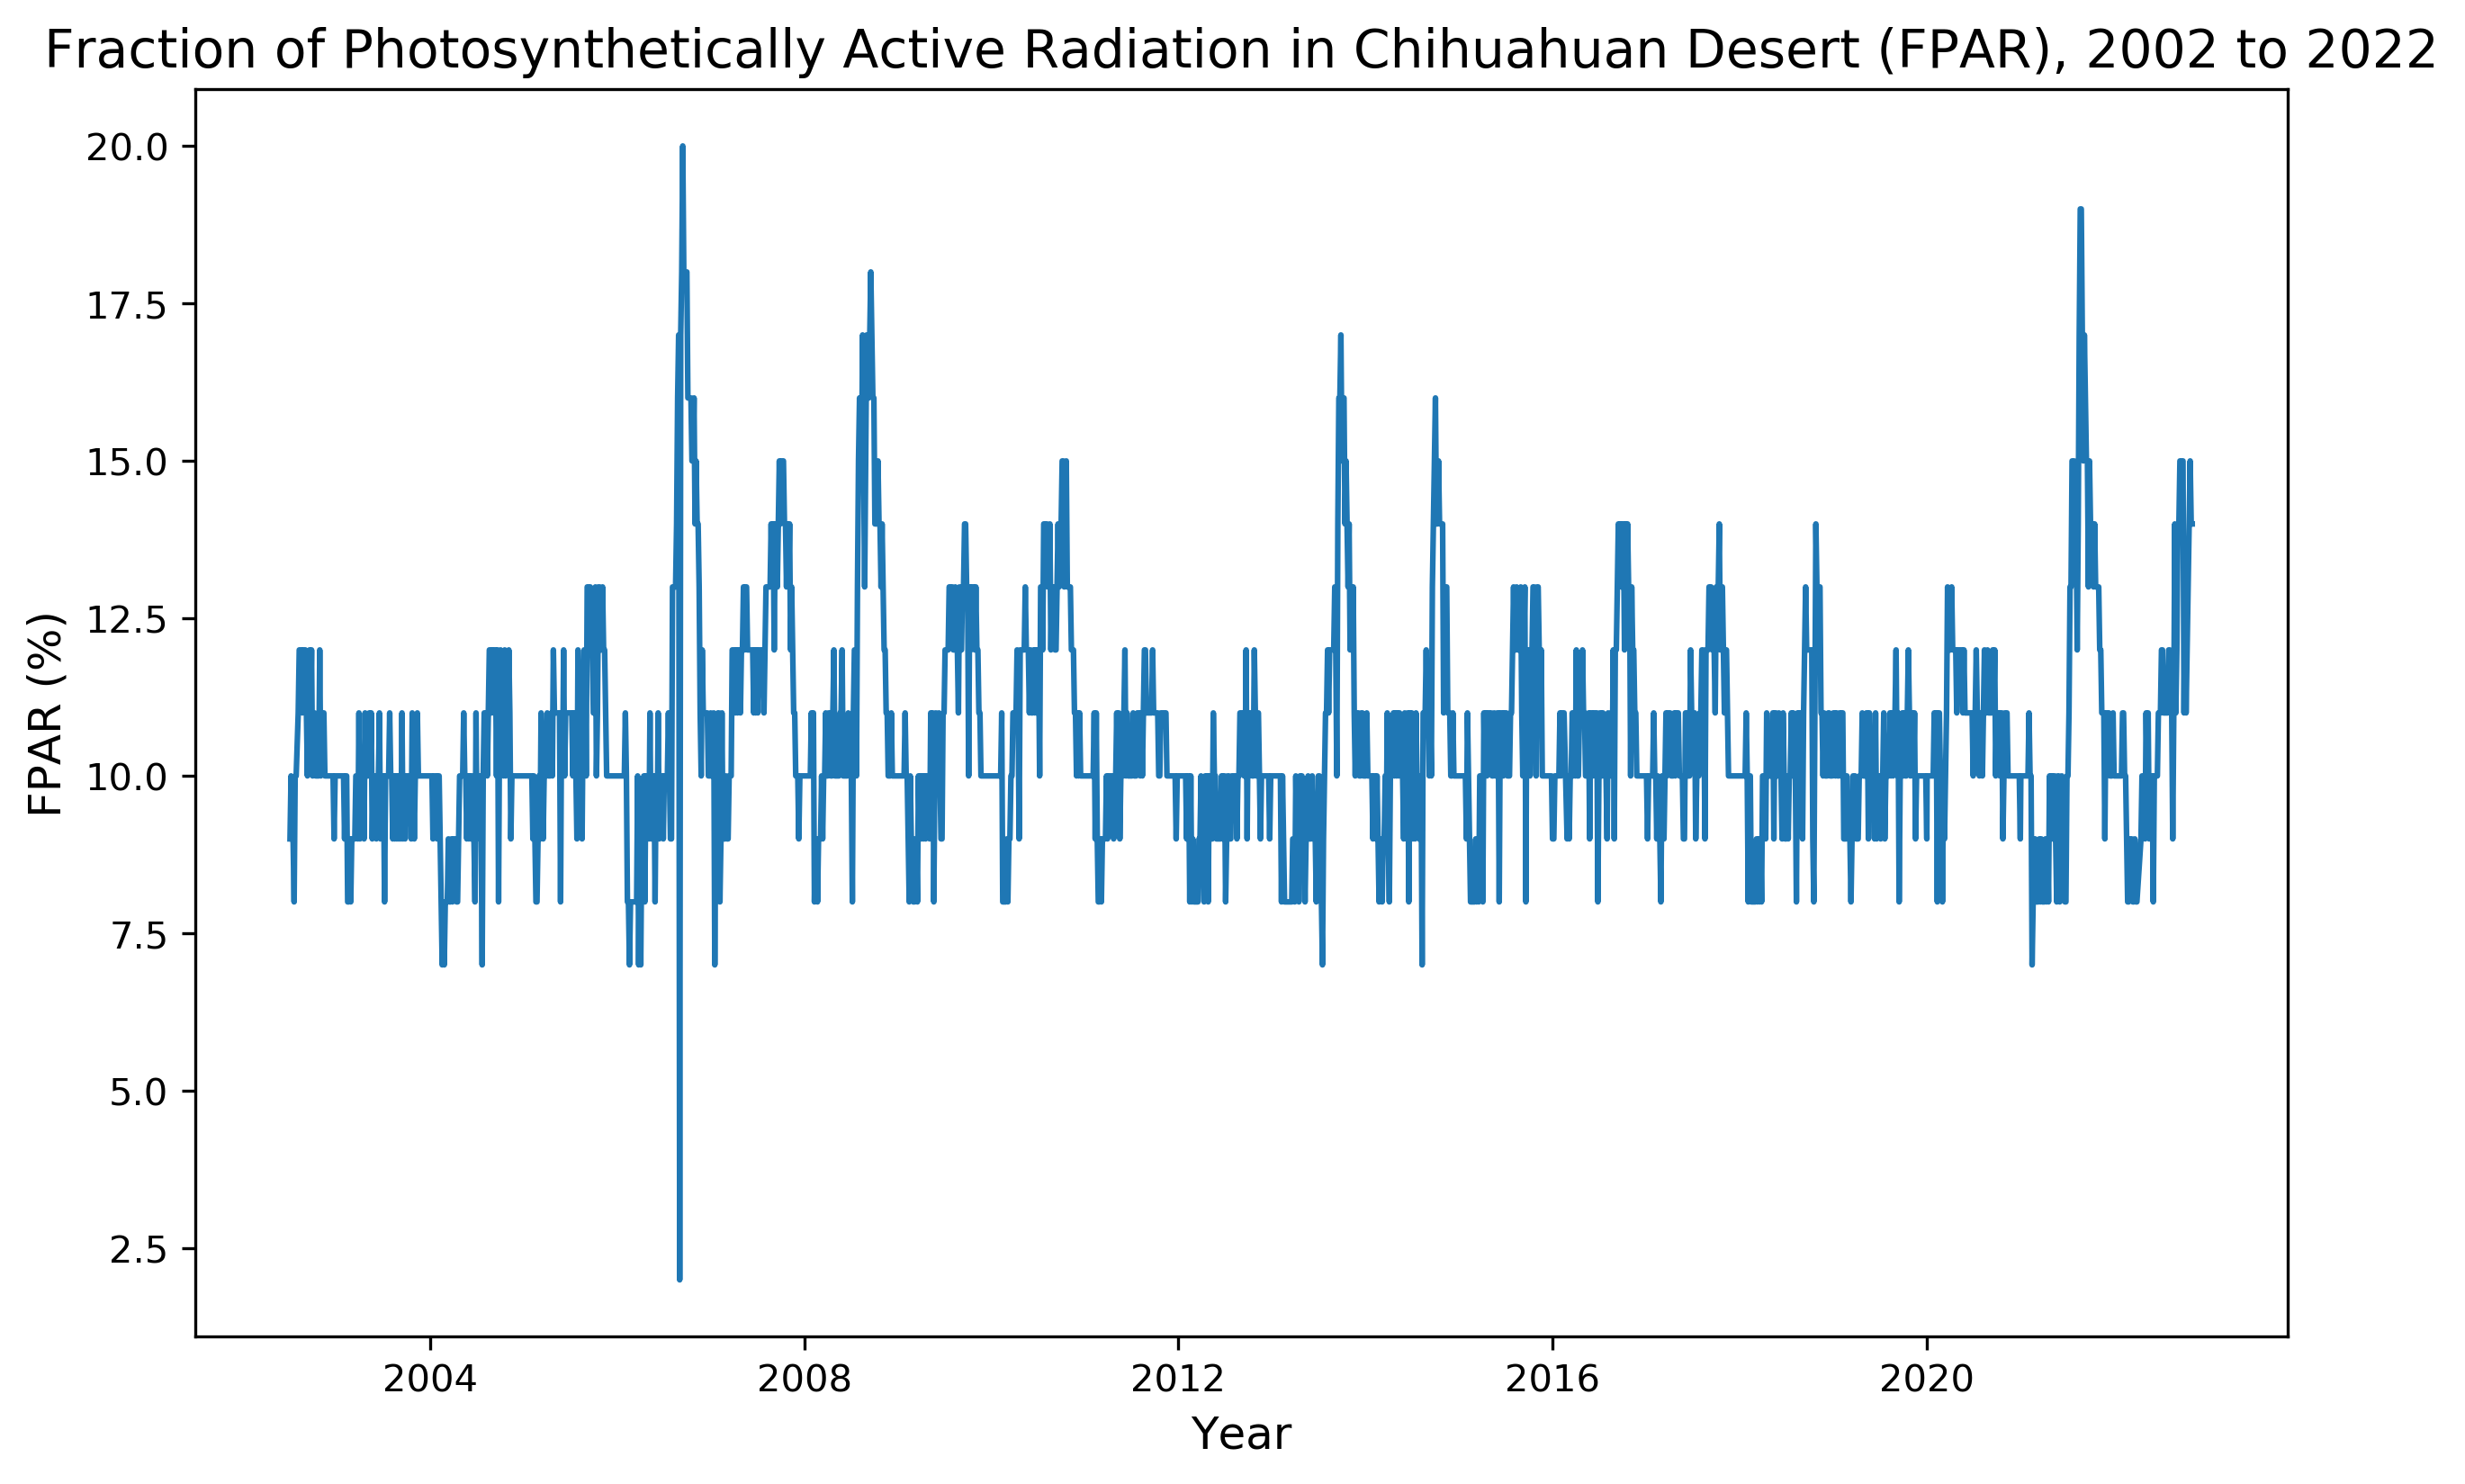

In [44]:
# Plot time series for FPAR variable in Chihuahuan Desert 
plt.figure(figsize = (10, 6), dpi = 300) # create figure; set size and resolution (dpi)
plt.plot(df_fparD['datetime'], df_fparD['Fpar']) # add data to plot
plt.title('Fraction of Photosynthetically Active Radiation in Chihuahuan Desert (FPAR), 2002 to 2022', fontsize = 14) # add title to plot
plt.xlabel('Year', fontsize = 12) # add x label to plot
plt.ylabel('FPAR (%)', fontsize = 12) # add y label to plot

And let's make a histogram plot:

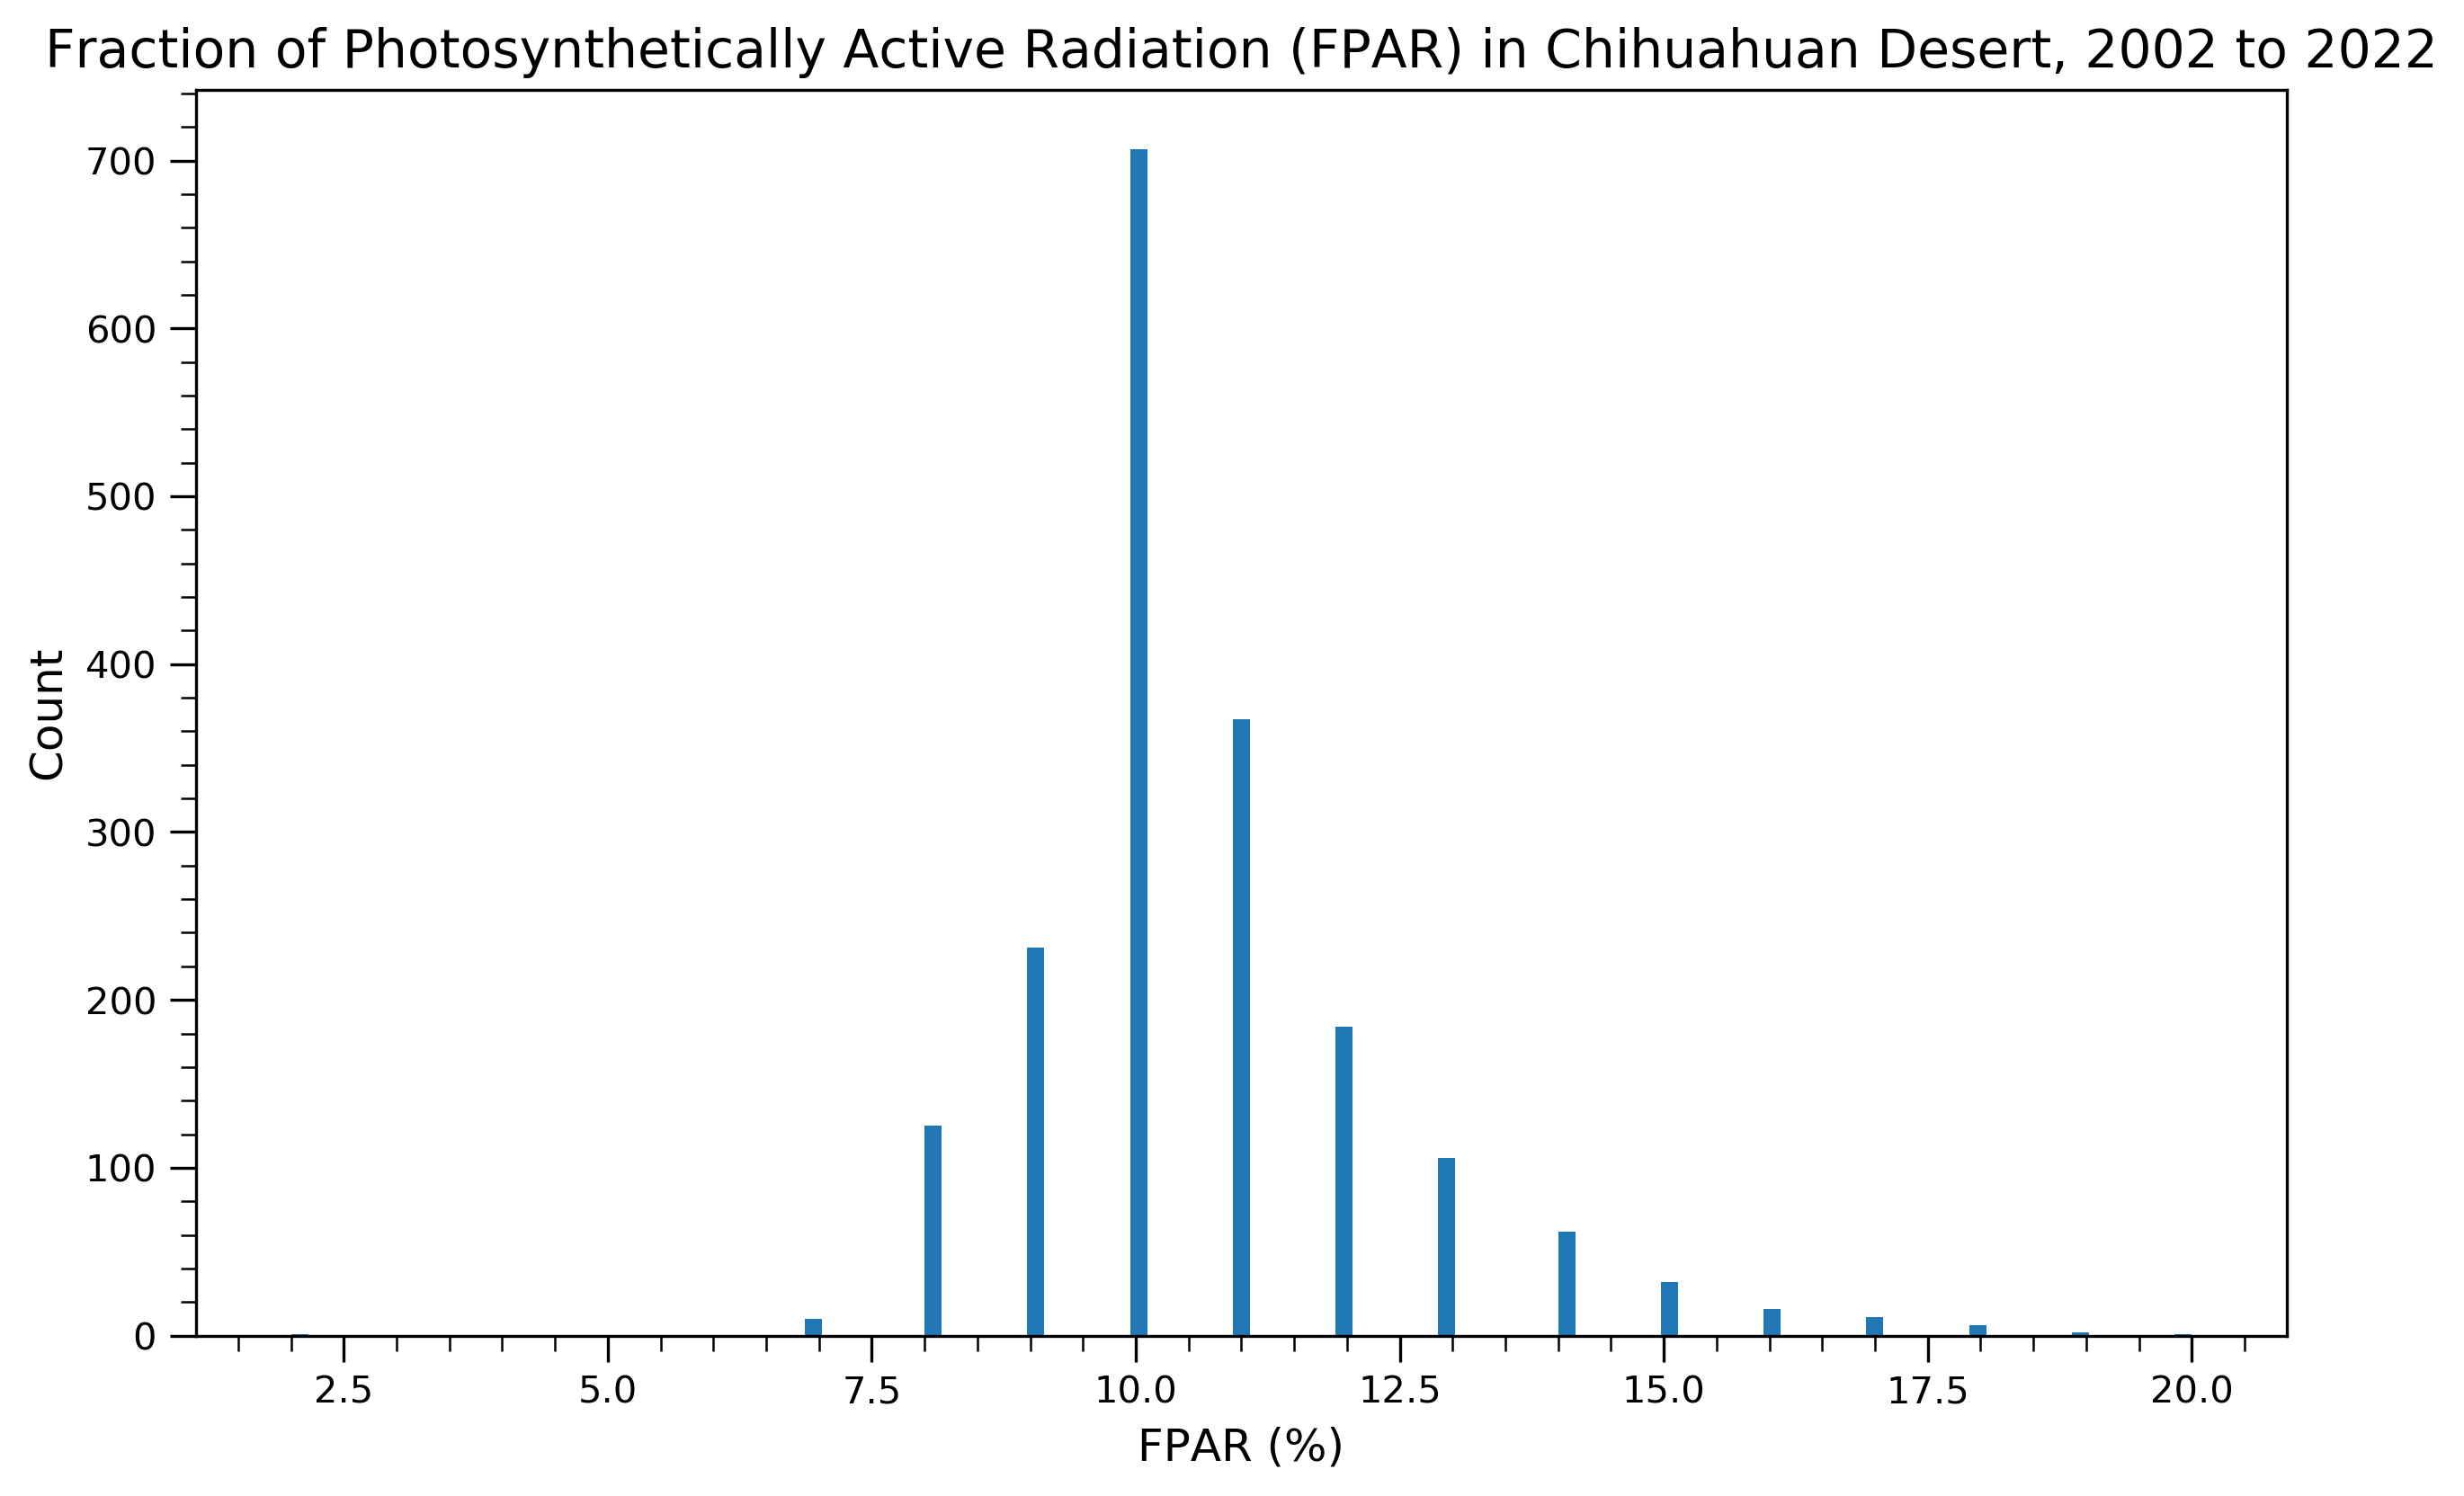

In [43]:
# Plot histogram for FPAR variable in Chihuahuan Desert
fig, ax = plt.subplots(figsize = (10, 6), dpi = 300) # create figure; set size and resolution (dpi)
n, bins, patches = ax.hist(x = df_fparD['Fpar'], bins = 'auto') # add histogram to plot
plt.title('Fraction of Photosynthetically Active Radiation (FPAR) in Chihuahuan Desert, 2002 to 2022', fontsize = 14) # add title to plot
plt.xlabel('FPAR (%)', fontsize = 12) # add x label to plot
plt.ylabel('Count', fontsize = 12) # add y label to plot
ax.yaxis.set_minor_locator(AutoMinorLocator()) # set automatic tick selection for y-axis
ax.xaxis.set_minor_locator(AutoMinorLocator()) # set automatic tick selection for x-axis
ax.tick_params(which = 'major', length = 7) # set major ticks
ax.tick_params(which = 'minor', length = 4) # set minor ticks

#### Fraction of Photosynthetically Active Radiation in Lacandon Jungle

First, create data frame to use for data visualization:

In [11]:
# Create data frame for FPAR variable in Lacandon Jungle
fparJ = gdat.select('Fpar') # select FPAR band name/variable
fpar_tsJ = fparJ.getRegion(POI_jungle, scale).getInfo() # extract data
df_fparJ = pd.DataFrame(fpar_tsJ).dropna() # save data frame

# Tidy data frame
df_fparJ = pd.DataFrame(df_fparJ.values[1:], columns = headers_1) # add headers
print(df_fparJ) # view data frame 

# Convert time to datetime
df_fparJ['datetime'] = pd.to_datetime(df_fparJ['time'], unit = 'ms')

0             id  longitude   latitude           time Fpar
0     2002_07_04 -91.583243  17.023075  1025740800000   69
1     2002_07_08 -91.583243  17.023075  1026086400000   72
2     2002_07_12 -91.583243  17.023075  1026432000000   40
3     2002_07_16 -91.583243  17.023075  1026777600000   76
4     2002_07_20 -91.583243  17.023075  1027123200000   83
...          ...        ...        ...            ...  ...
1856  2022_10_04 -91.583243  17.023075  1664841600000   72
1857  2022_10_08 -91.583243  17.023075  1665187200000   42
1858  2022_10_24 -91.583243  17.023075  1666569600000   85
1859  2022_10_28 -91.583243  17.023075  1666915200000   88
1860  2022_11_01 -91.583243  17.023075  1667260800000   86

[1861 rows x 5 columns]


Now, let's make a time series plot:

Text(0, 0.5, 'FPAR (%)')

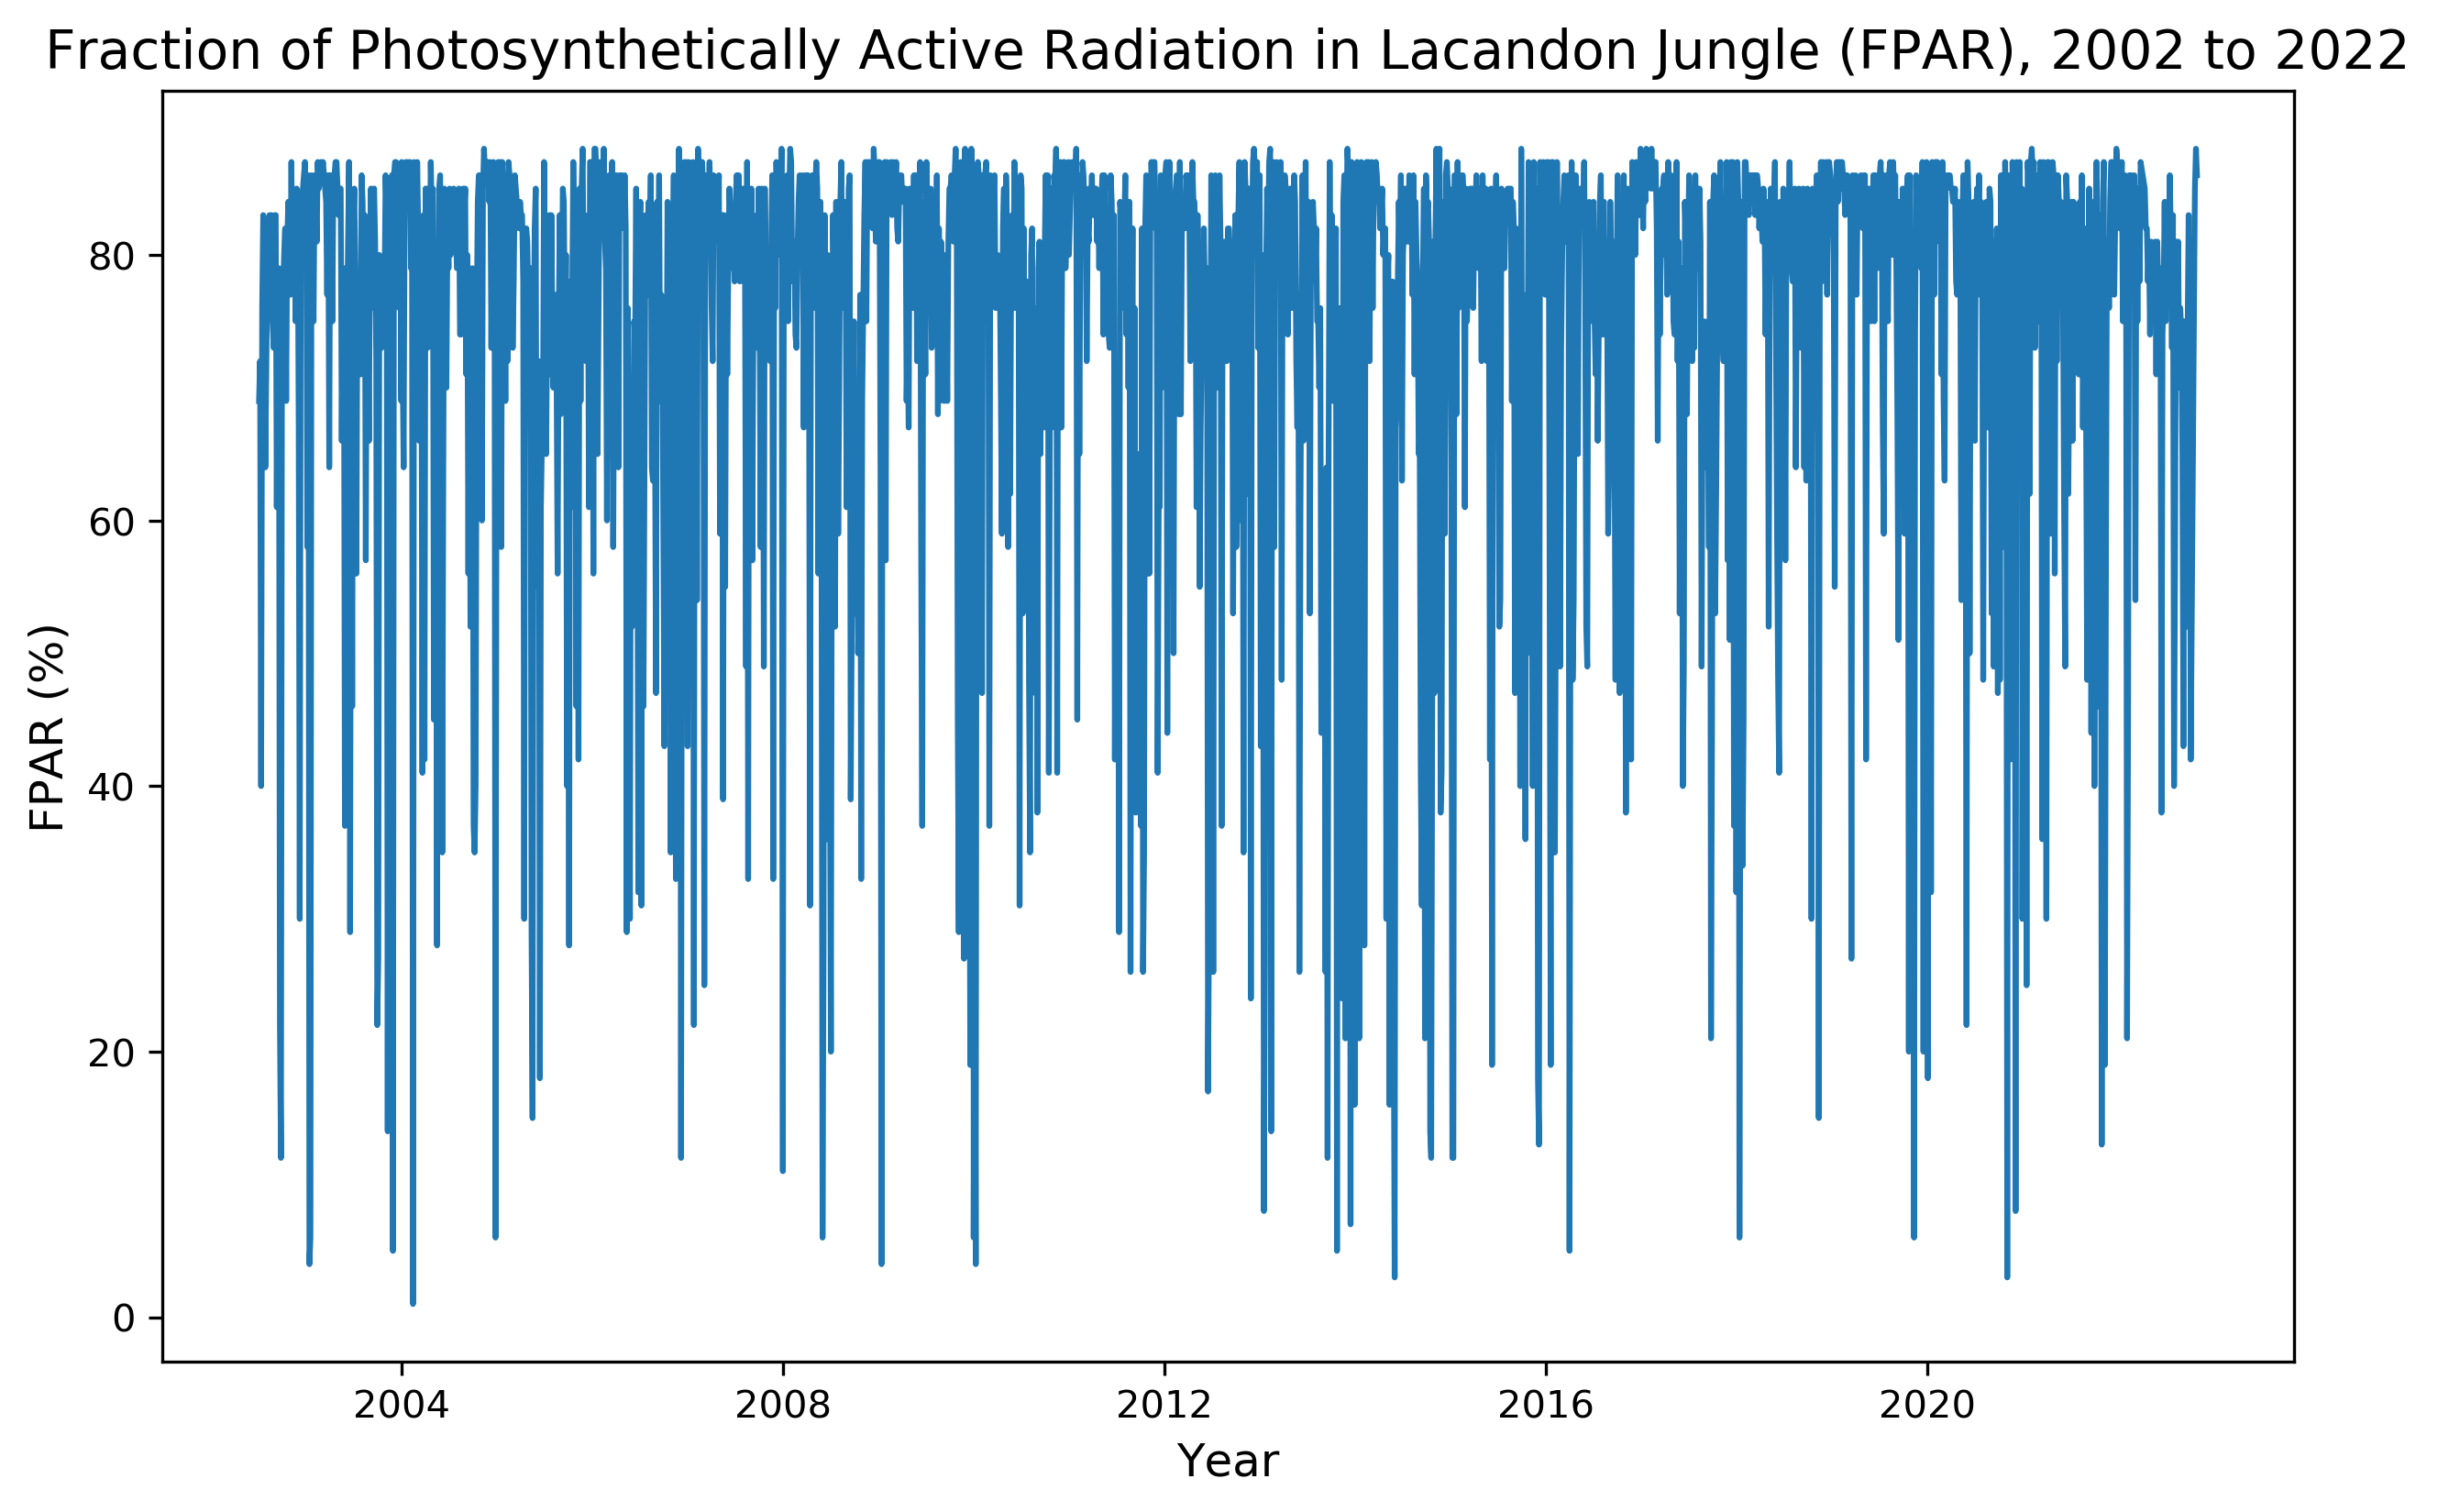

In [42]:
# Plot time series for FPAR variable in Lacandon Jungle
plt.figure(figsize = (10, 6), dpi = 300) # create figure; set size and resolution (dpi)
plt.plot(df_fparJ['datetime'], df_fparJ['Fpar']) # add data to plot
plt.title('Fraction of Photosynthetically Active Radiation in Lacandon Jungle (FPAR), 2002 to 2022', fontsize = 14) # add title to plot
plt.xlabel('Year', fontsize = 12) # add x label to plot
plt.ylabel('FPAR (%)', fontsize = 12) # add y label to plot

And let's make a histogram plot:

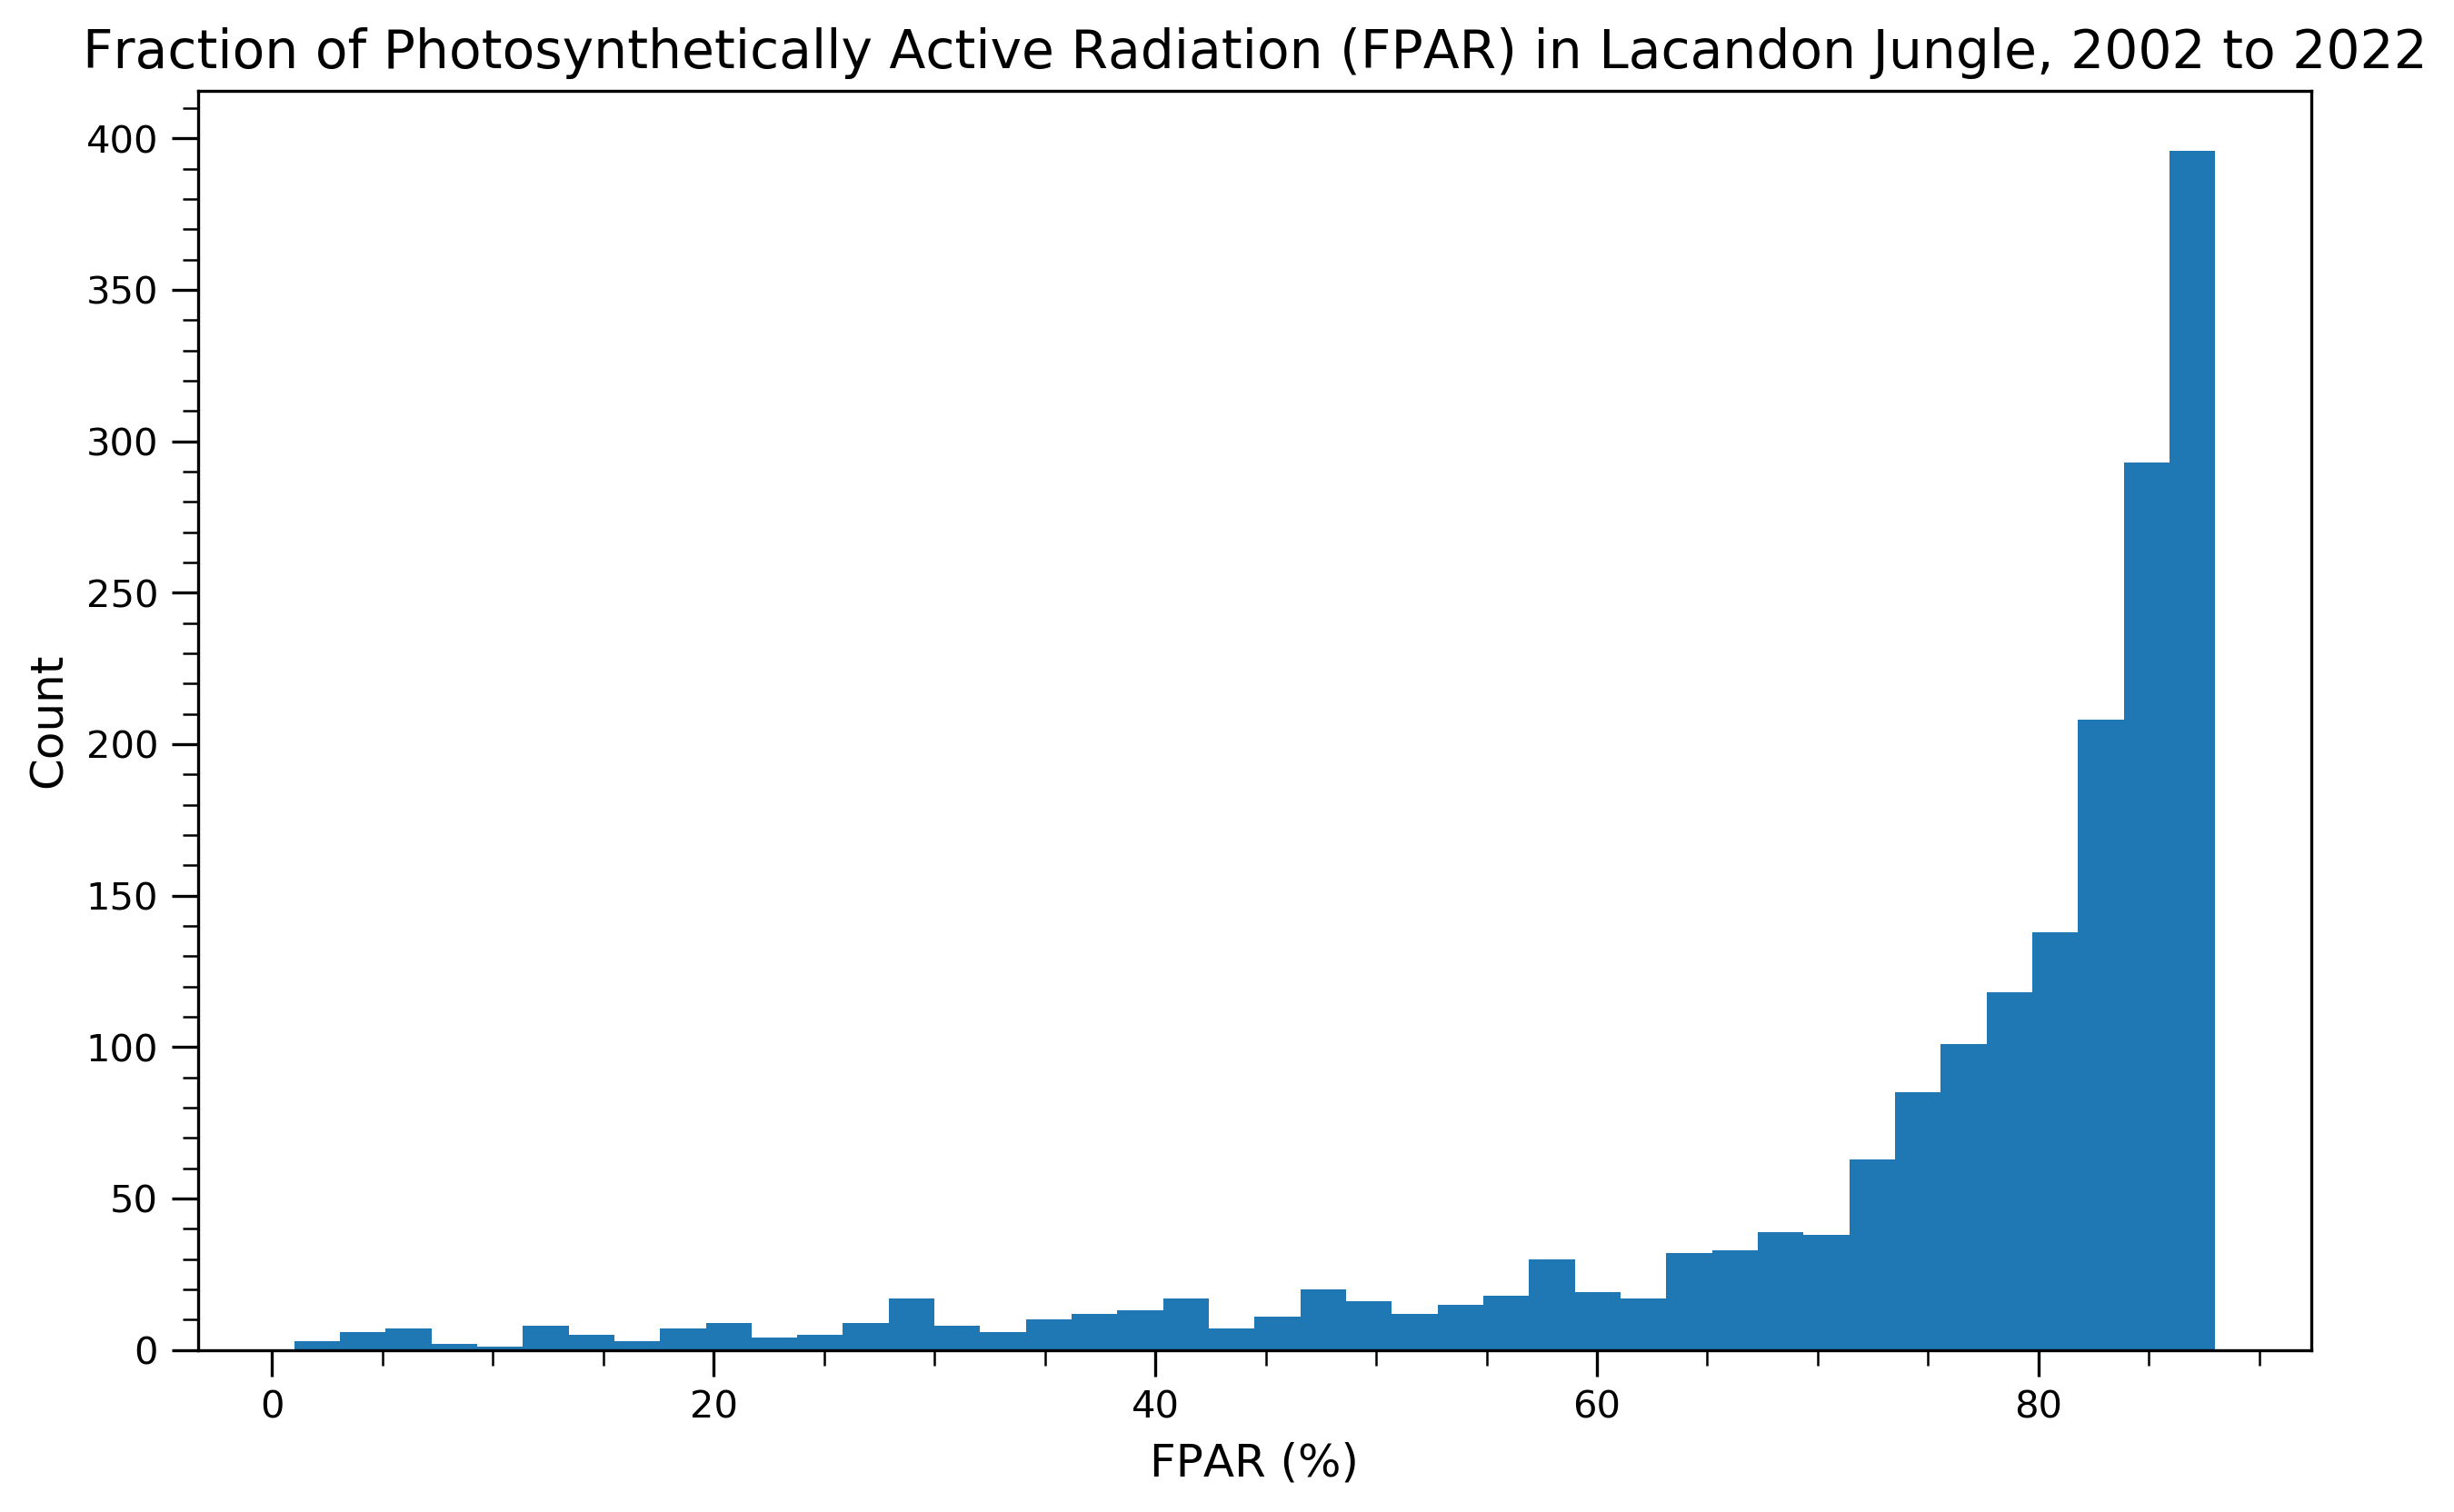

In [45]:
# Plot histogram for FPAR variable in Lacandon Jungle
fig, ax = plt.subplots(figsize = (10, 6), dpi = 300) # create figure; set size and resolution (dpi)
n, bins, patches = ax.hist(x = df_fparJ['Fpar'], bins = 'auto') # add histogram to plot
plt.title('Fraction of Photosynthetically Active Radiation (FPAR) in Lacandon Jungle, 2002 to 2022', fontsize = 14) # add title to plot
plt.xlabel('FPAR (%)', fontsize = 12) # add x label to plot
plt.ylabel('Count', fontsize = 12) # add y label to plot
ax.yaxis.set_minor_locator(AutoMinorLocator()) # set automatic tick selection for y-axis
ax.xaxis.set_minor_locator(AutoMinorLocator()) # set automatic tick selection for x-axis
ax.tick_params(which = 'major', length = 7) # set major ticks
ax.tick_params(which = 'minor', length = 4) # set minor ticks

#### Leaf Area Index in Chihuahuan Desert

First, create data frame to use for data visualization:

In [13]:
# Create data frame for LAI variable in Chihuahuan Desert 
laiD = gdat.select('Lai') # select LAI band name/variable
lai_tsD = laiD.getRegion(POI_desert, scale).getInfo() # extract data
df_laiD = pd.DataFrame(lai_tsD).dropna() # save data frame

# Tidy data frame
headers_2 = df_laiD.loc[0] # extract headers
df_laiD = pd.DataFrame(df_laiD.values[1:], columns = headers_2) # add headers
print(df_laiD) # view data frame 

# Convert time to datetime
df_laiD['datetime'] = pd.to_datetime(df_laiD['time'], unit = 'ms')

0             id   longitude   latitude           time Lai
0     2002_07_04 -106.495277  31.755445  1025740800000   2
1     2002_07_08 -106.495277  31.755445  1026086400000   2
2     2002_07_12 -106.495277  31.755445  1026432000000   2
3     2002_07_16 -106.495277  31.755445  1026777600000   2
4     2002_07_20 -106.495277  31.755445  1027123200000   2
...          ...         ...        ...            ...  ..
1856  2022_10_04 -106.495277  31.755445  1664841600000   2
1857  2022_10_08 -106.495277  31.755445  1665187200000   2
1858  2022_10_24 -106.495277  31.755445  1666569600000   2
1859  2022_10_28 -106.495277  31.755445  1666915200000   2
1860  2022_11_01 -106.495277  31.755445  1667260800000   2

[1861 rows x 5 columns]


Next, let's make a time series plot:

Text(0, 0.5, 'Leaf Area Index (m²/m²)')

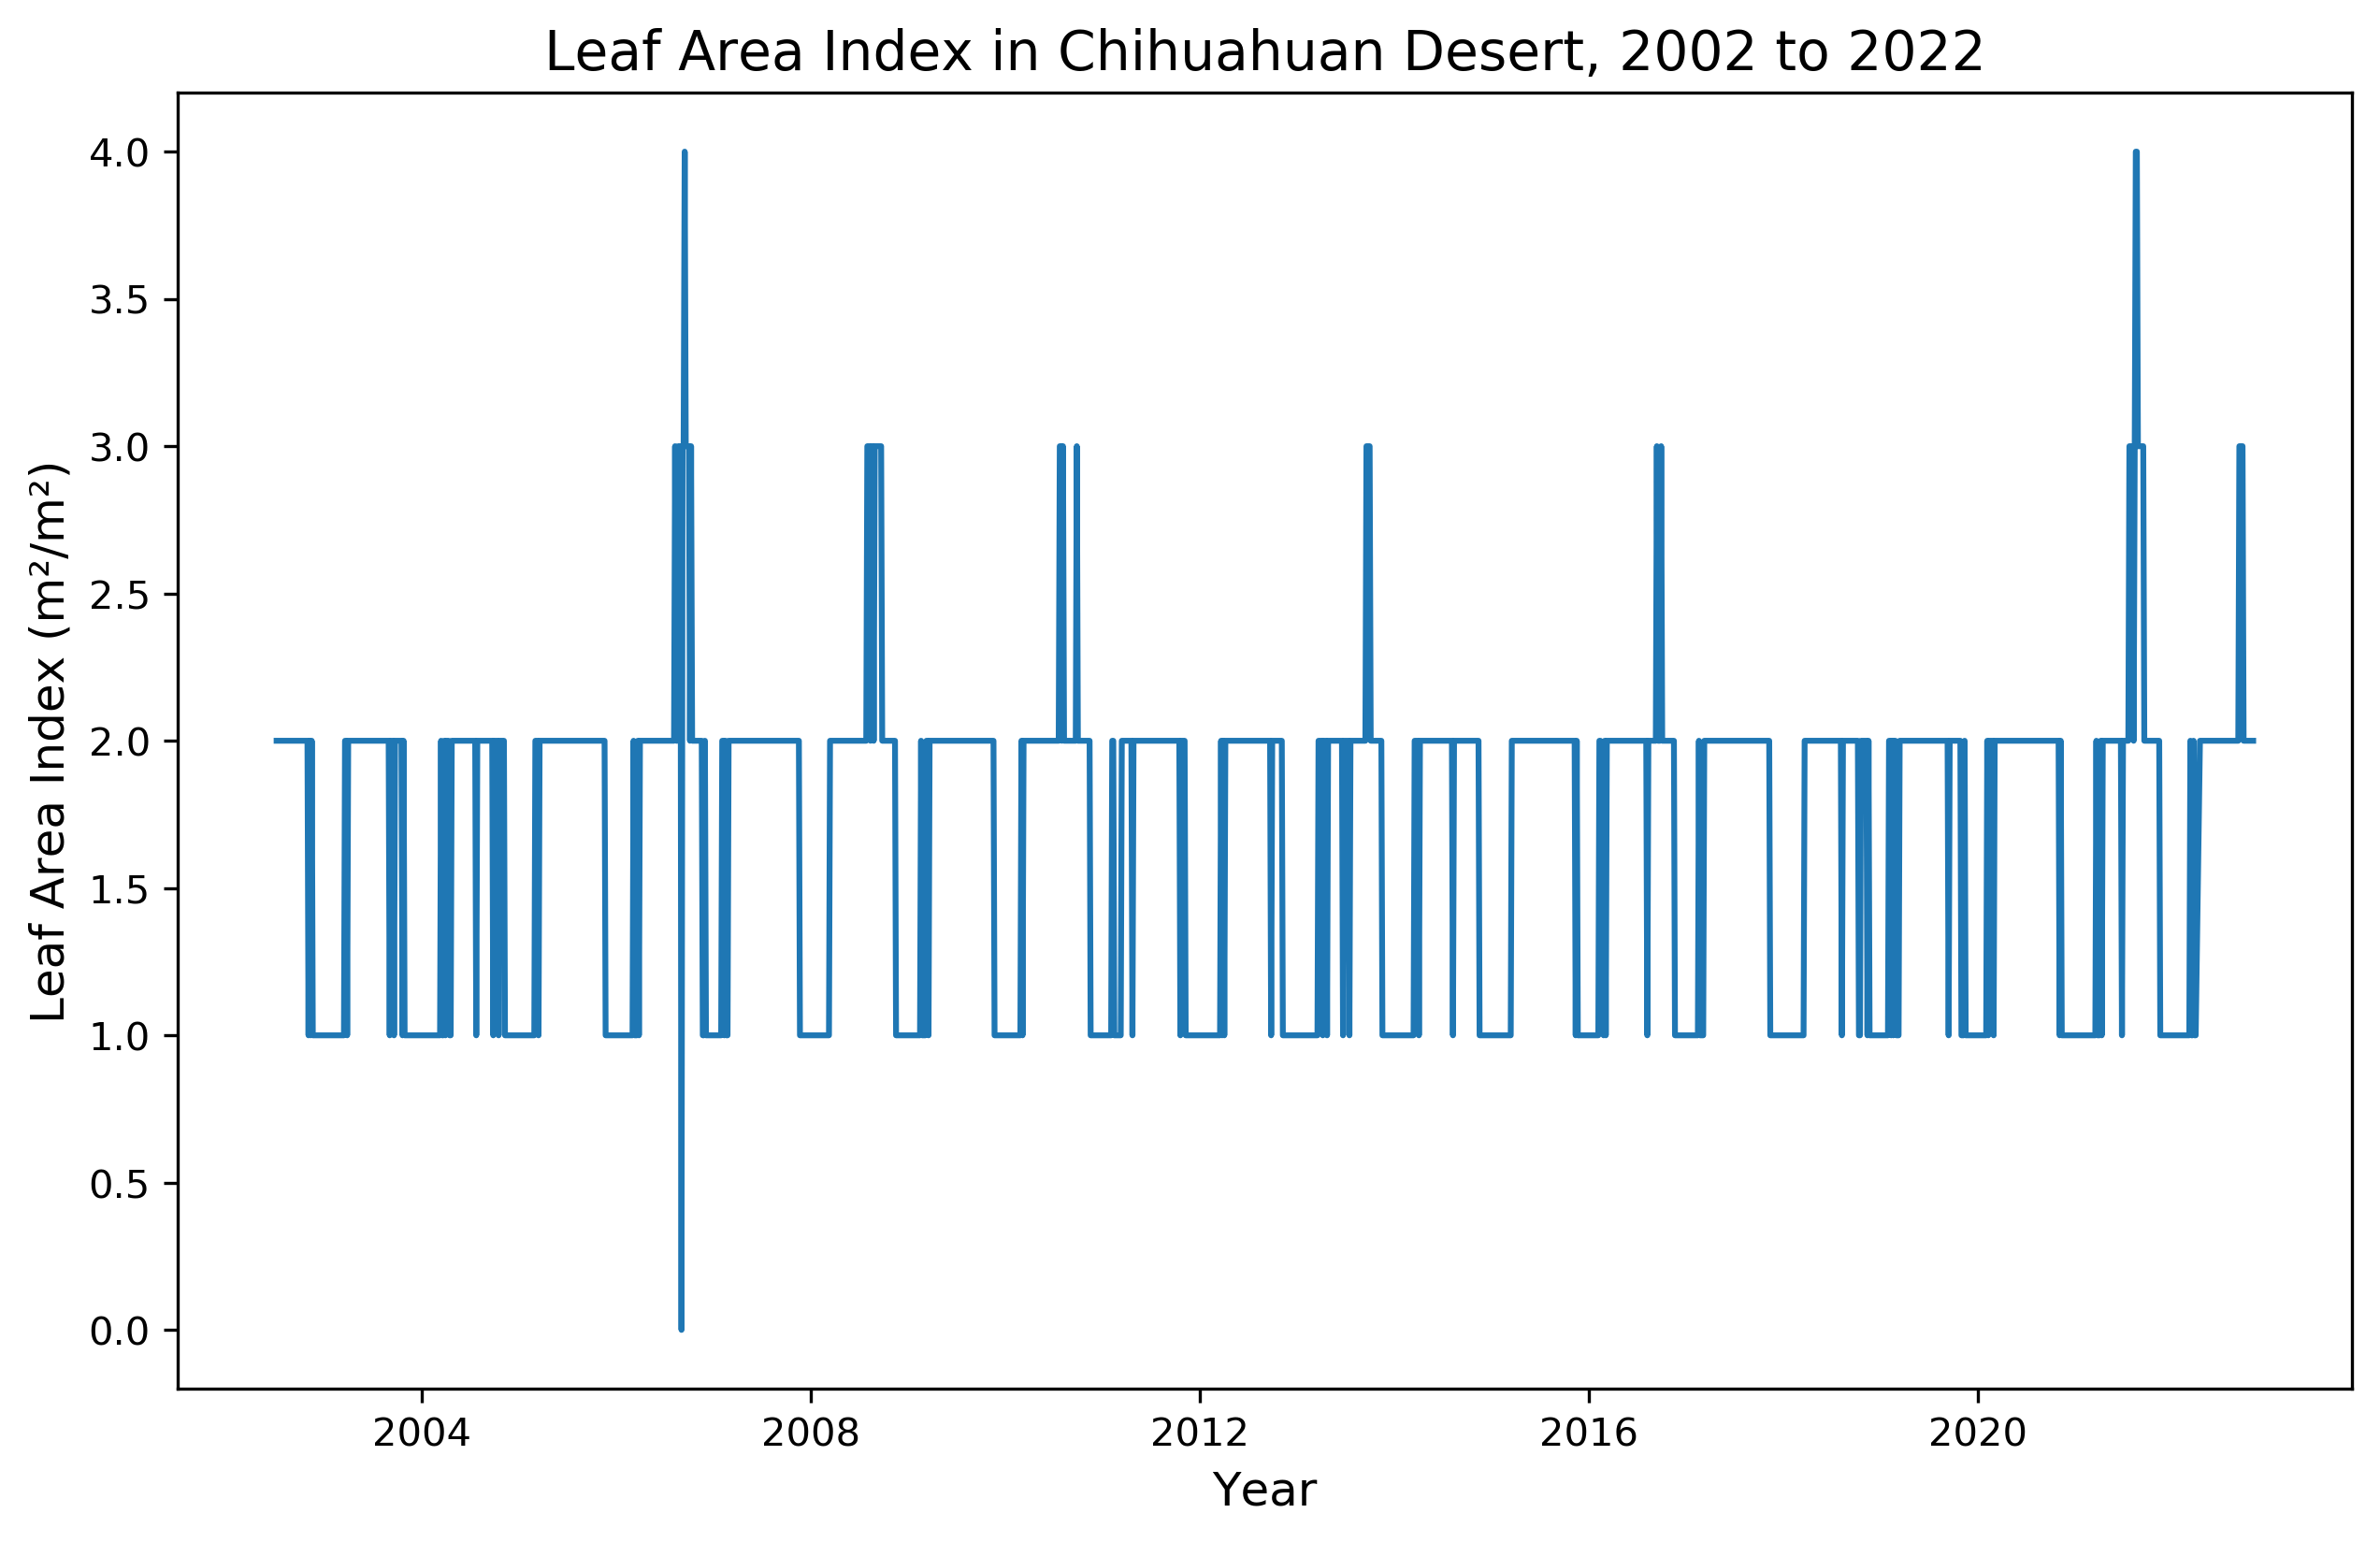

In [41]:
# Plot time series for LAI variable in Chihuahuan Desert 
plt.figure(figsize = (10, 6), dpi = 300) # create figure; set size and resolution (dpi)
plt.plot(df_laiD['datetime'], df_laiD['Lai']) # add data to plot
plt.title('Leaf Area Index in Chihuahuan Desert, 2002 to 2022', fontsize = 14) # add title to plot
plt.xlabel('Year', fontsize = 12) # add x label to plot
plt.ylabel('Leaf Area Index (m²/m²)', fontsize = 12) # add y label to plot

And let's make a histogram plot:

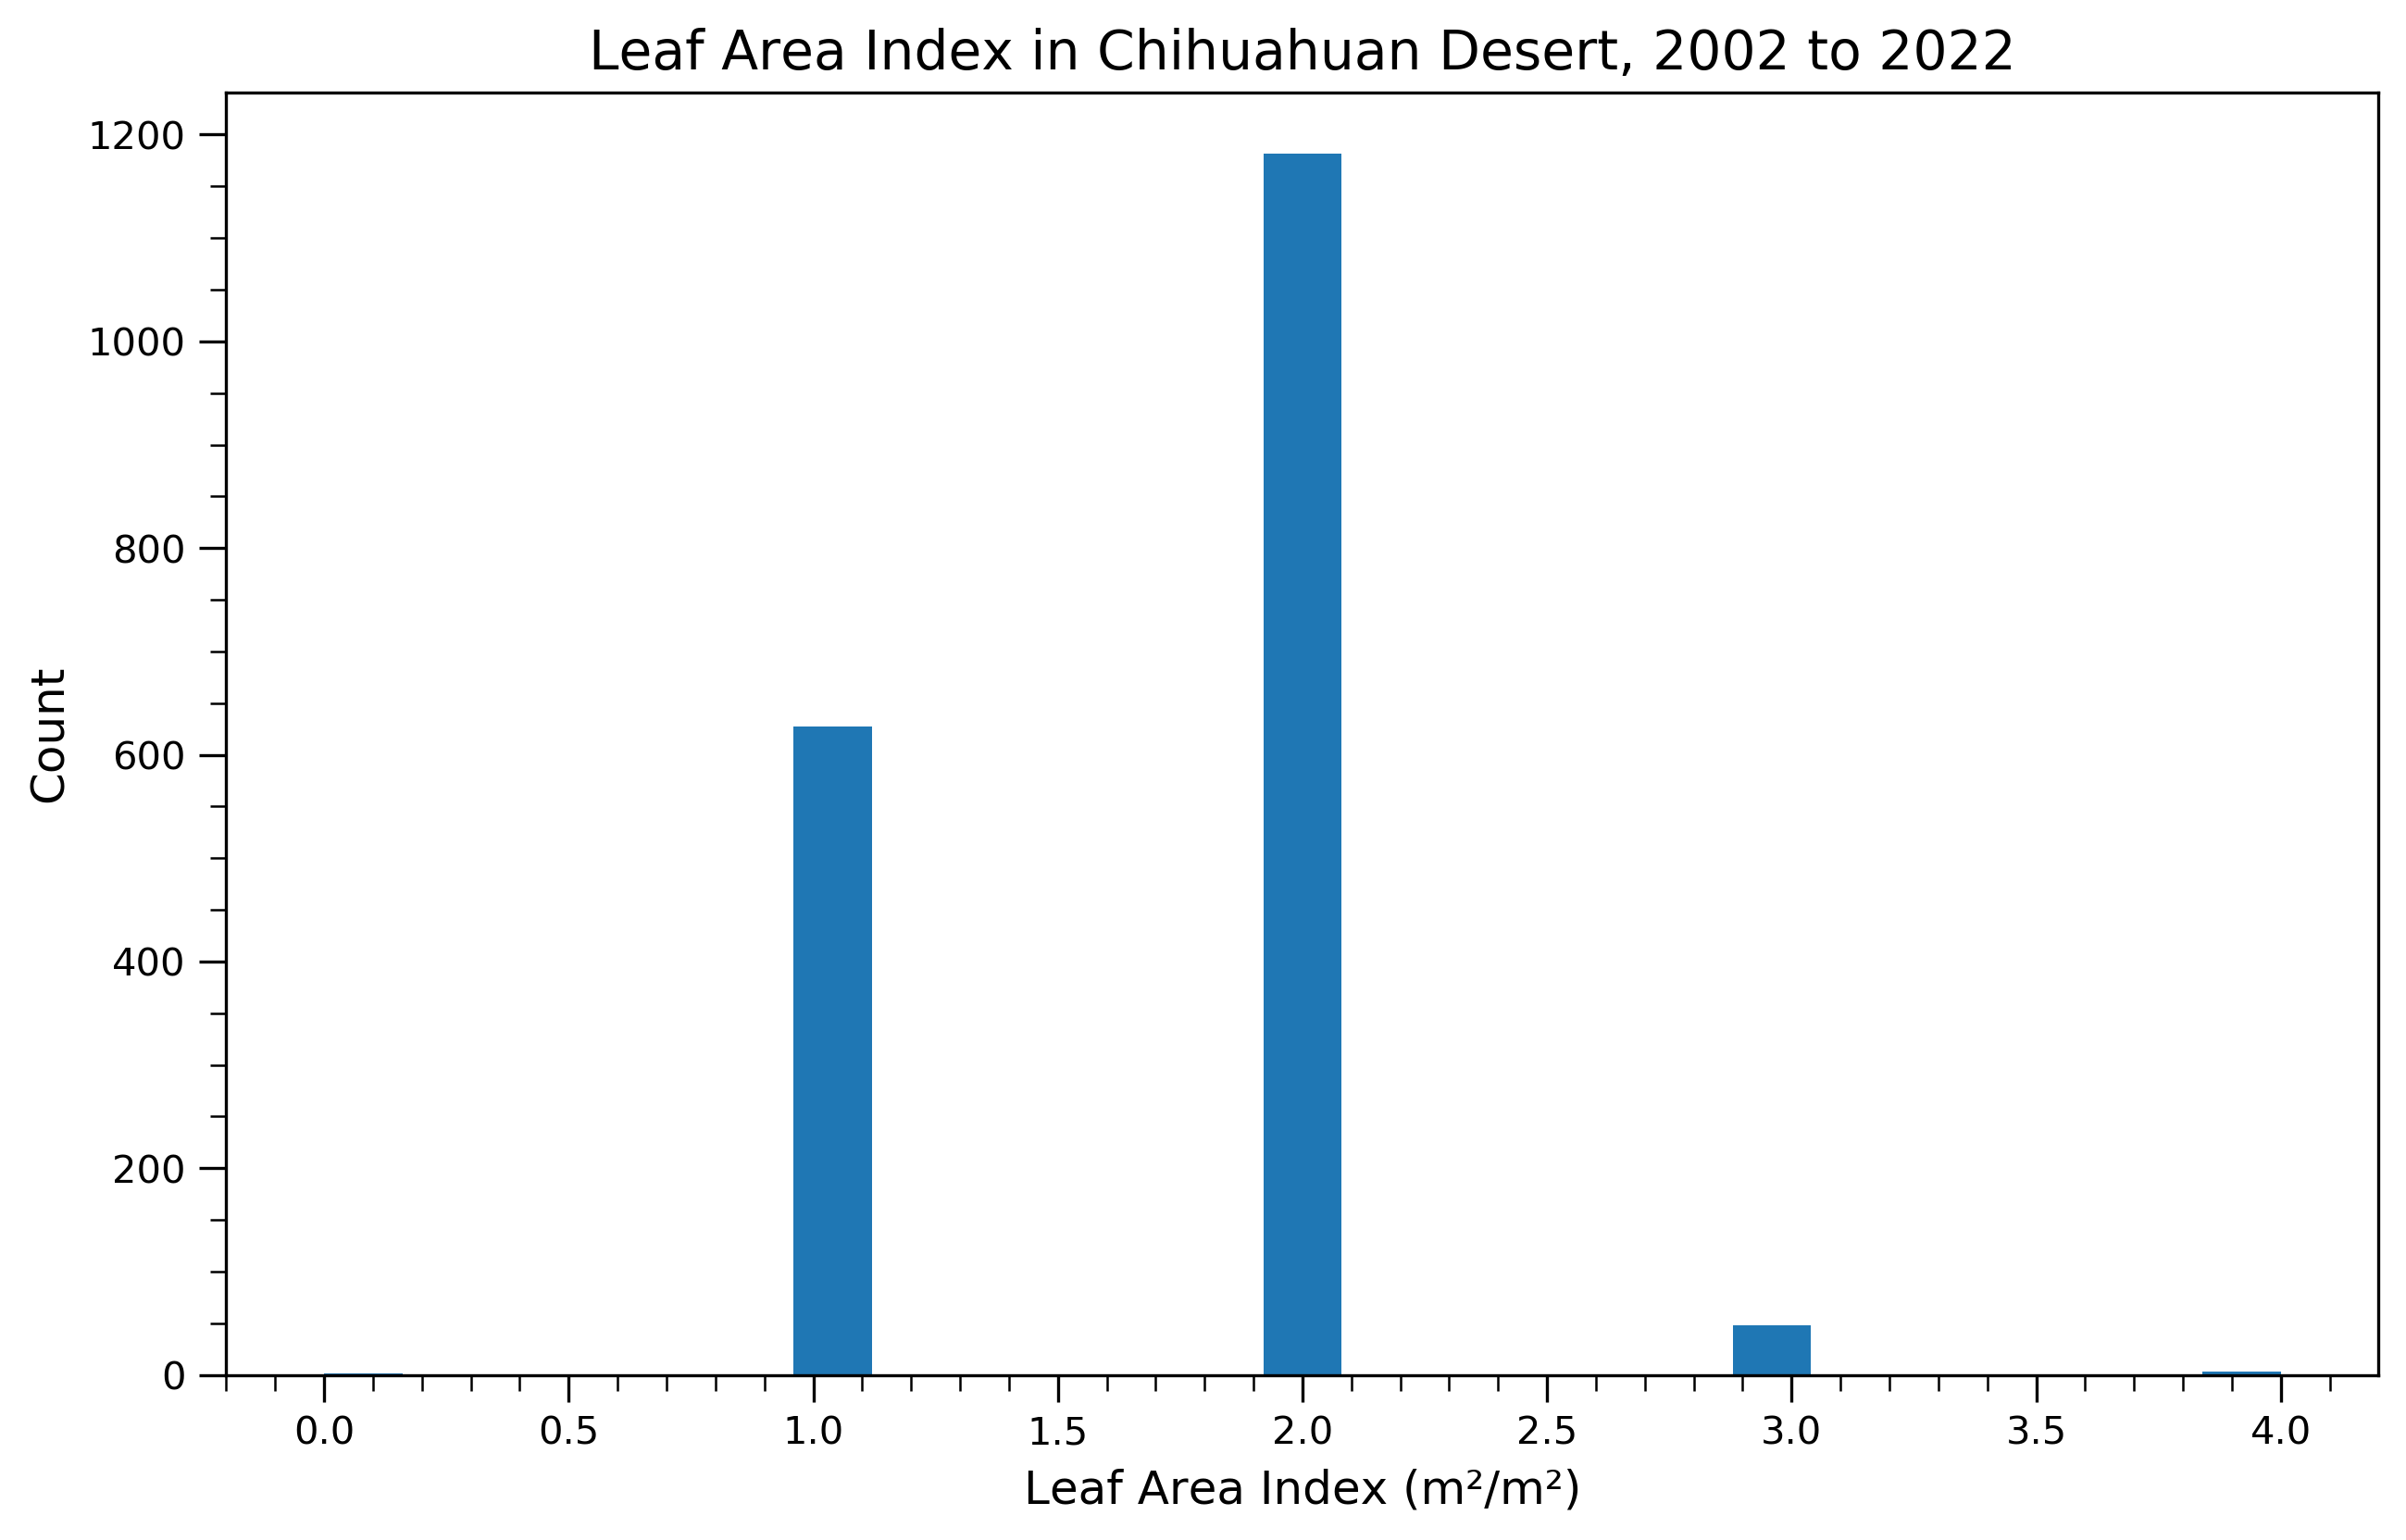

In [40]:
# Plot histogram for LAI variable in Chihuahuan Desert 
fig, ax = plt.subplots(figsize = (10, 6), dpi = 300) # create figure; set size and resolution (dpi)
n, bins, patches = ax.hist(x = df_laiD['Lai'], bins = 'auto') # add histogram to plot
plt.title('Leaf Area Index in Chihuahuan Desert, 2002 to 2022', fontsize = 14) # add title to plot
plt.xlabel('Leaf Area Index (m²/m²)', fontsize = 12) # add x-axis to plot
plt.ylabel('Count', fontsize = 12) # add y label to plot
ax.yaxis.set_minor_locator(AutoMinorLocator()) # set automatic tick selection for y-axis
ax.xaxis.set_minor_locator(AutoMinorLocator()) # set automatic tick selection for x-axis
ax.tick_params(which = 'major', length = 7) # set major ticks
ax.tick_params(which = 'minor', length = 4) # set minor ticks

#### Leaf Area Index in Lacandon Jungle

First, create data frame to use for data visualization:

In [15]:
# Create data frame for LAI variable in Lacandon Jungle
laiJ = gdat.select('Lai') # select LAI band name/variable
lai_tsJ = laiJ.getRegion(POI_jungle, scale).getInfo() # extract data
df_laiJ = pd.DataFrame(lai_tsJ).dropna() # save data frame

# Tidy data frame
df_laiJ = pd.DataFrame(df_laiJ.values[1:], columns = headers_2) # add headers
print(df_laiJ) # view data frame 

# Convert time to datetime
df_laiJ['datetime'] = pd.to_datetime(df_laiJ['time'], unit = 'ms')

0             id  longitude   latitude           time Lai
0     2002_07_04 -91.583243  17.023075  1025740800000  35
1     2002_07_08 -91.583243  17.023075  1026086400000  40
2     2002_07_12 -91.583243  17.023075  1026432000000  11
3     2002_07_16 -91.583243  17.023075  1026777600000  44
4     2002_07_20 -91.583243  17.023075  1027123200000  51
...          ...        ...        ...            ...  ..
1856  2022_10_04 -91.583243  17.023075  1664841600000  39
1857  2022_10_08 -91.583243  17.023075  1665187200000  18
1858  2022_10_24 -91.583243  17.023075  1666569600000  54
1859  2022_10_28 -91.583243  17.023075  1666915200000  56
1860  2022_11_01 -91.583243  17.023075  1667260800000  52

[1861 rows x 5 columns]


Next, let's make a time series plot:

Text(0, 0.5, 'Leaf Area Index (m²/m²)')

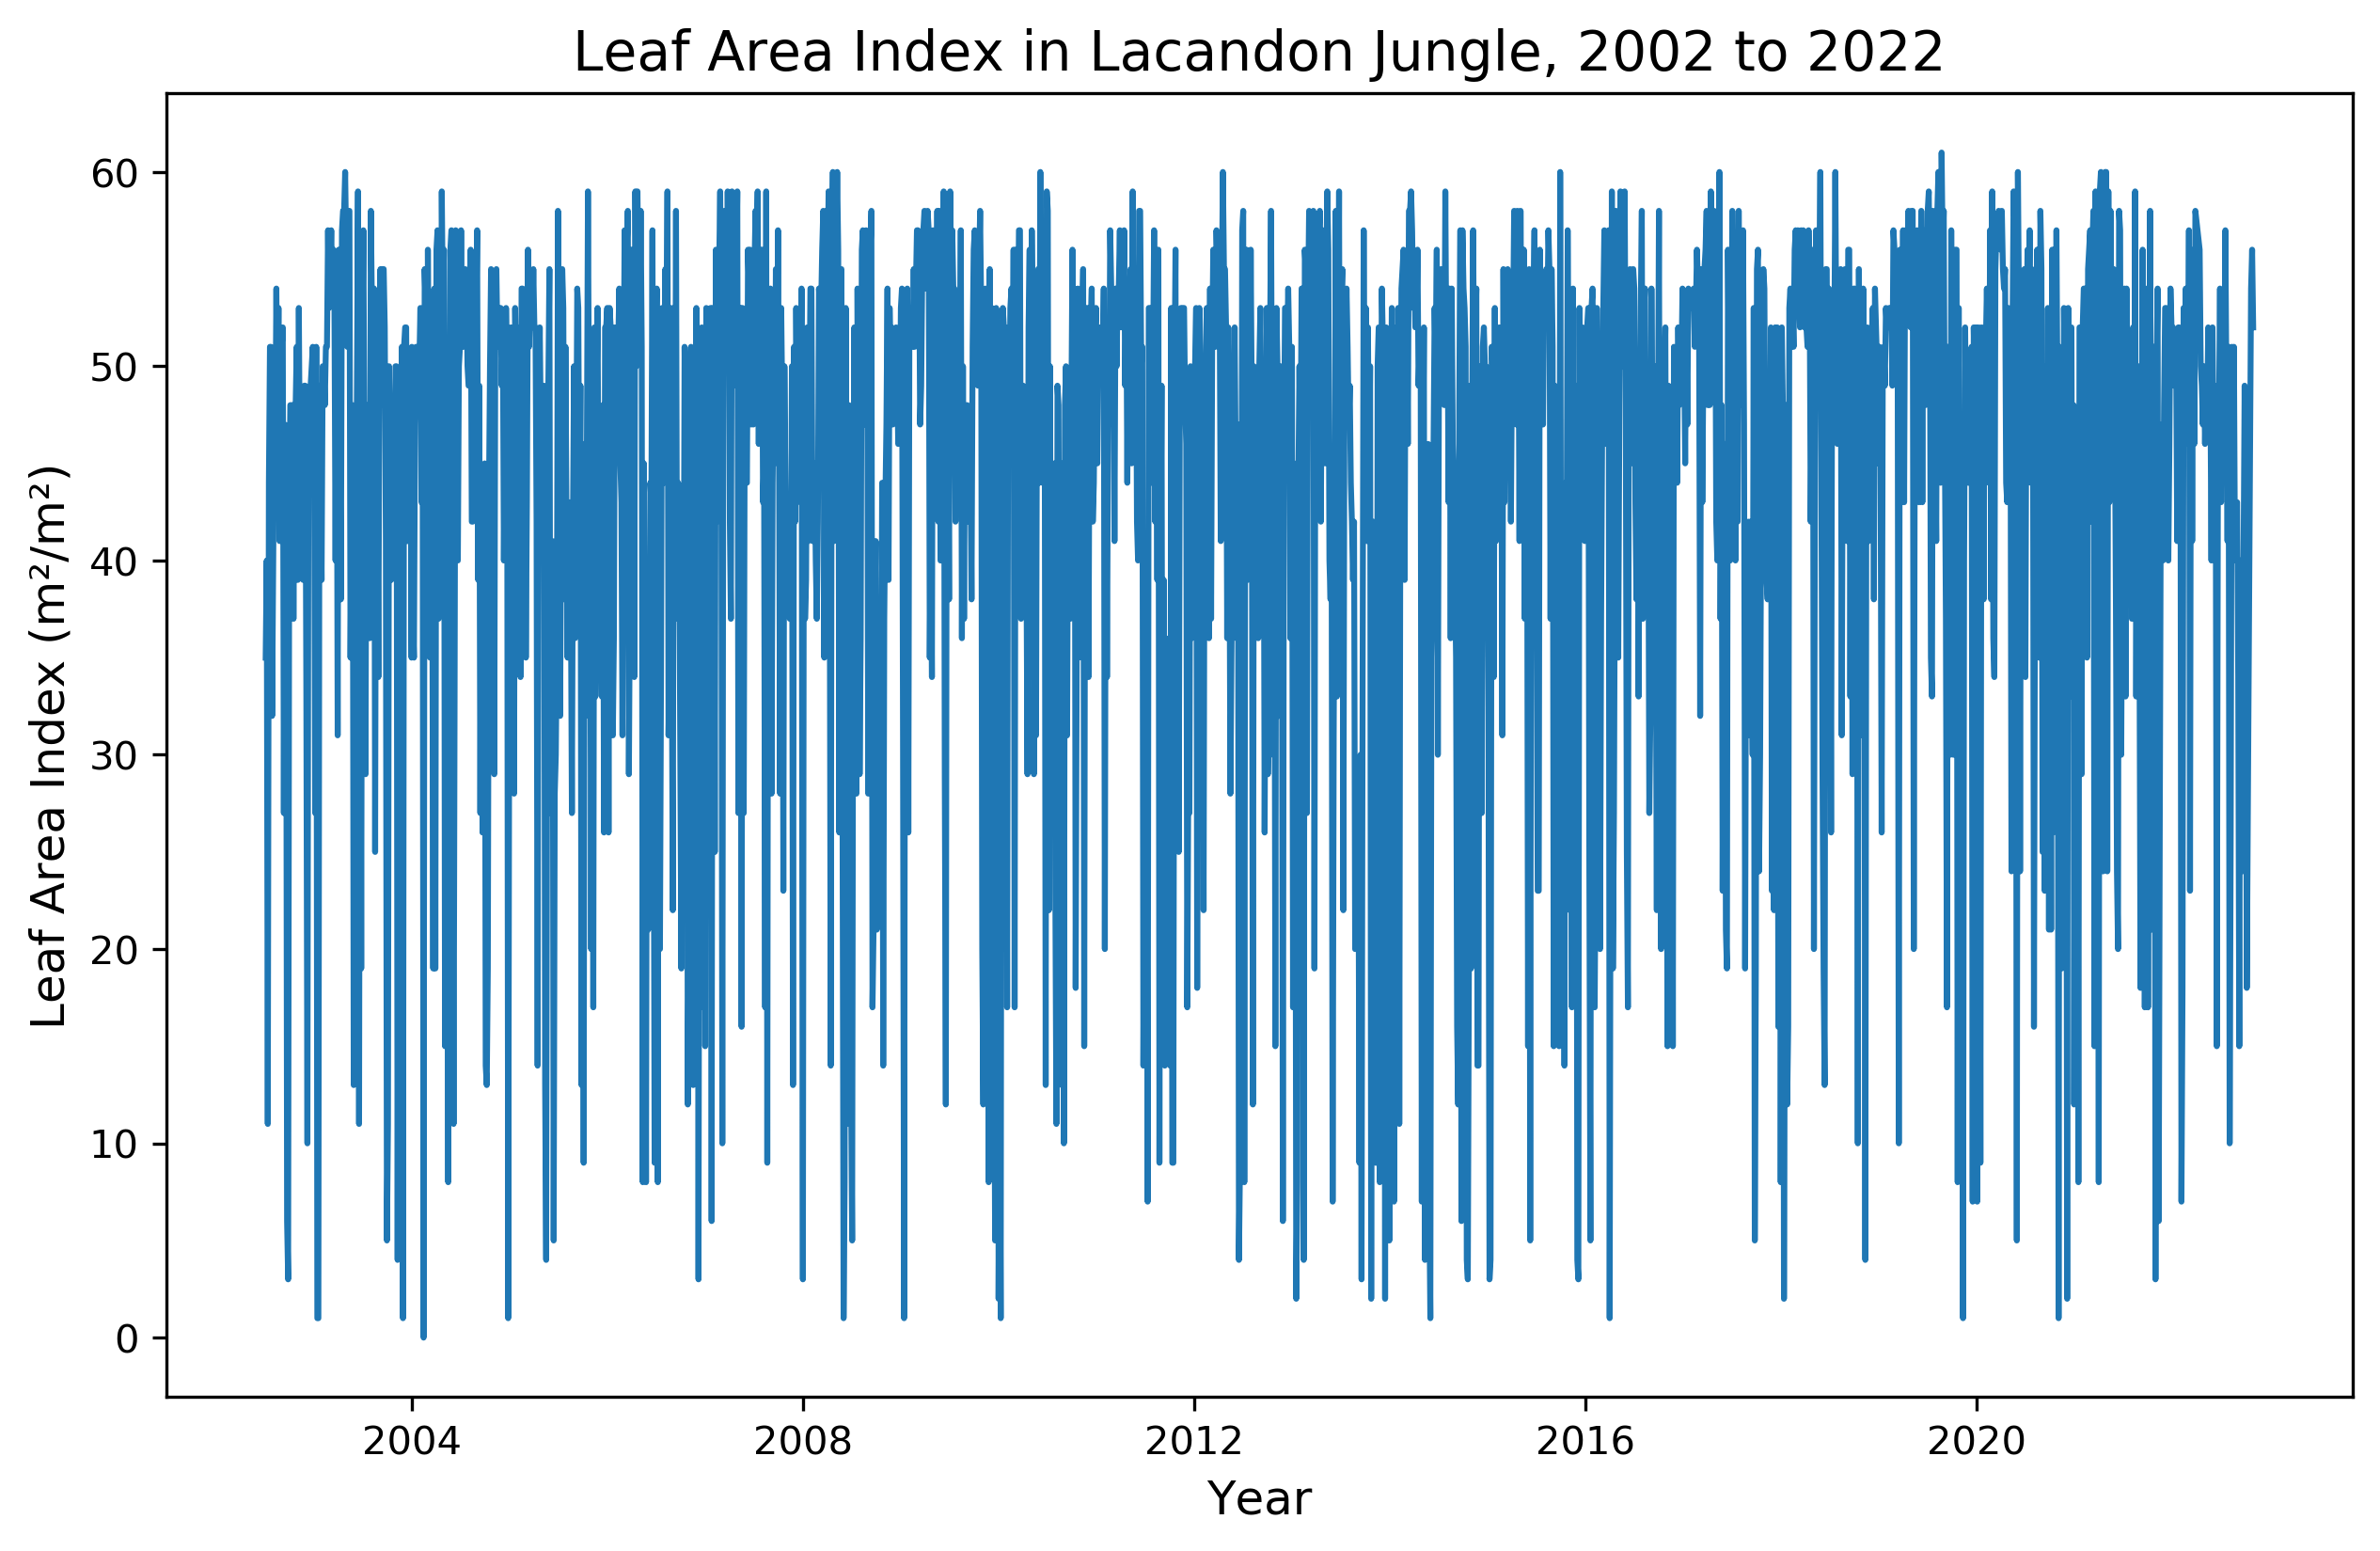

In [39]:
# Plot time series for LAI variable in Lacandon Jungle
plt.figure(figsize = (10, 6), dpi = 300) # create figure; set size and resolution (dpi)
plt.plot(df_laiJ['datetime'], df_laiJ['Lai']) # add data to plot
plt.title('Leaf Area Index in Lacandon Jungle, 2002 to 2022', fontsize = 14) # add title to plot
plt.xlabel('Year', fontsize = 12) # add x label to plot
plt.ylabel('Leaf Area Index (m²/m²)', fontsize = 12) # add y label to plot

And let's make a histogram plot:

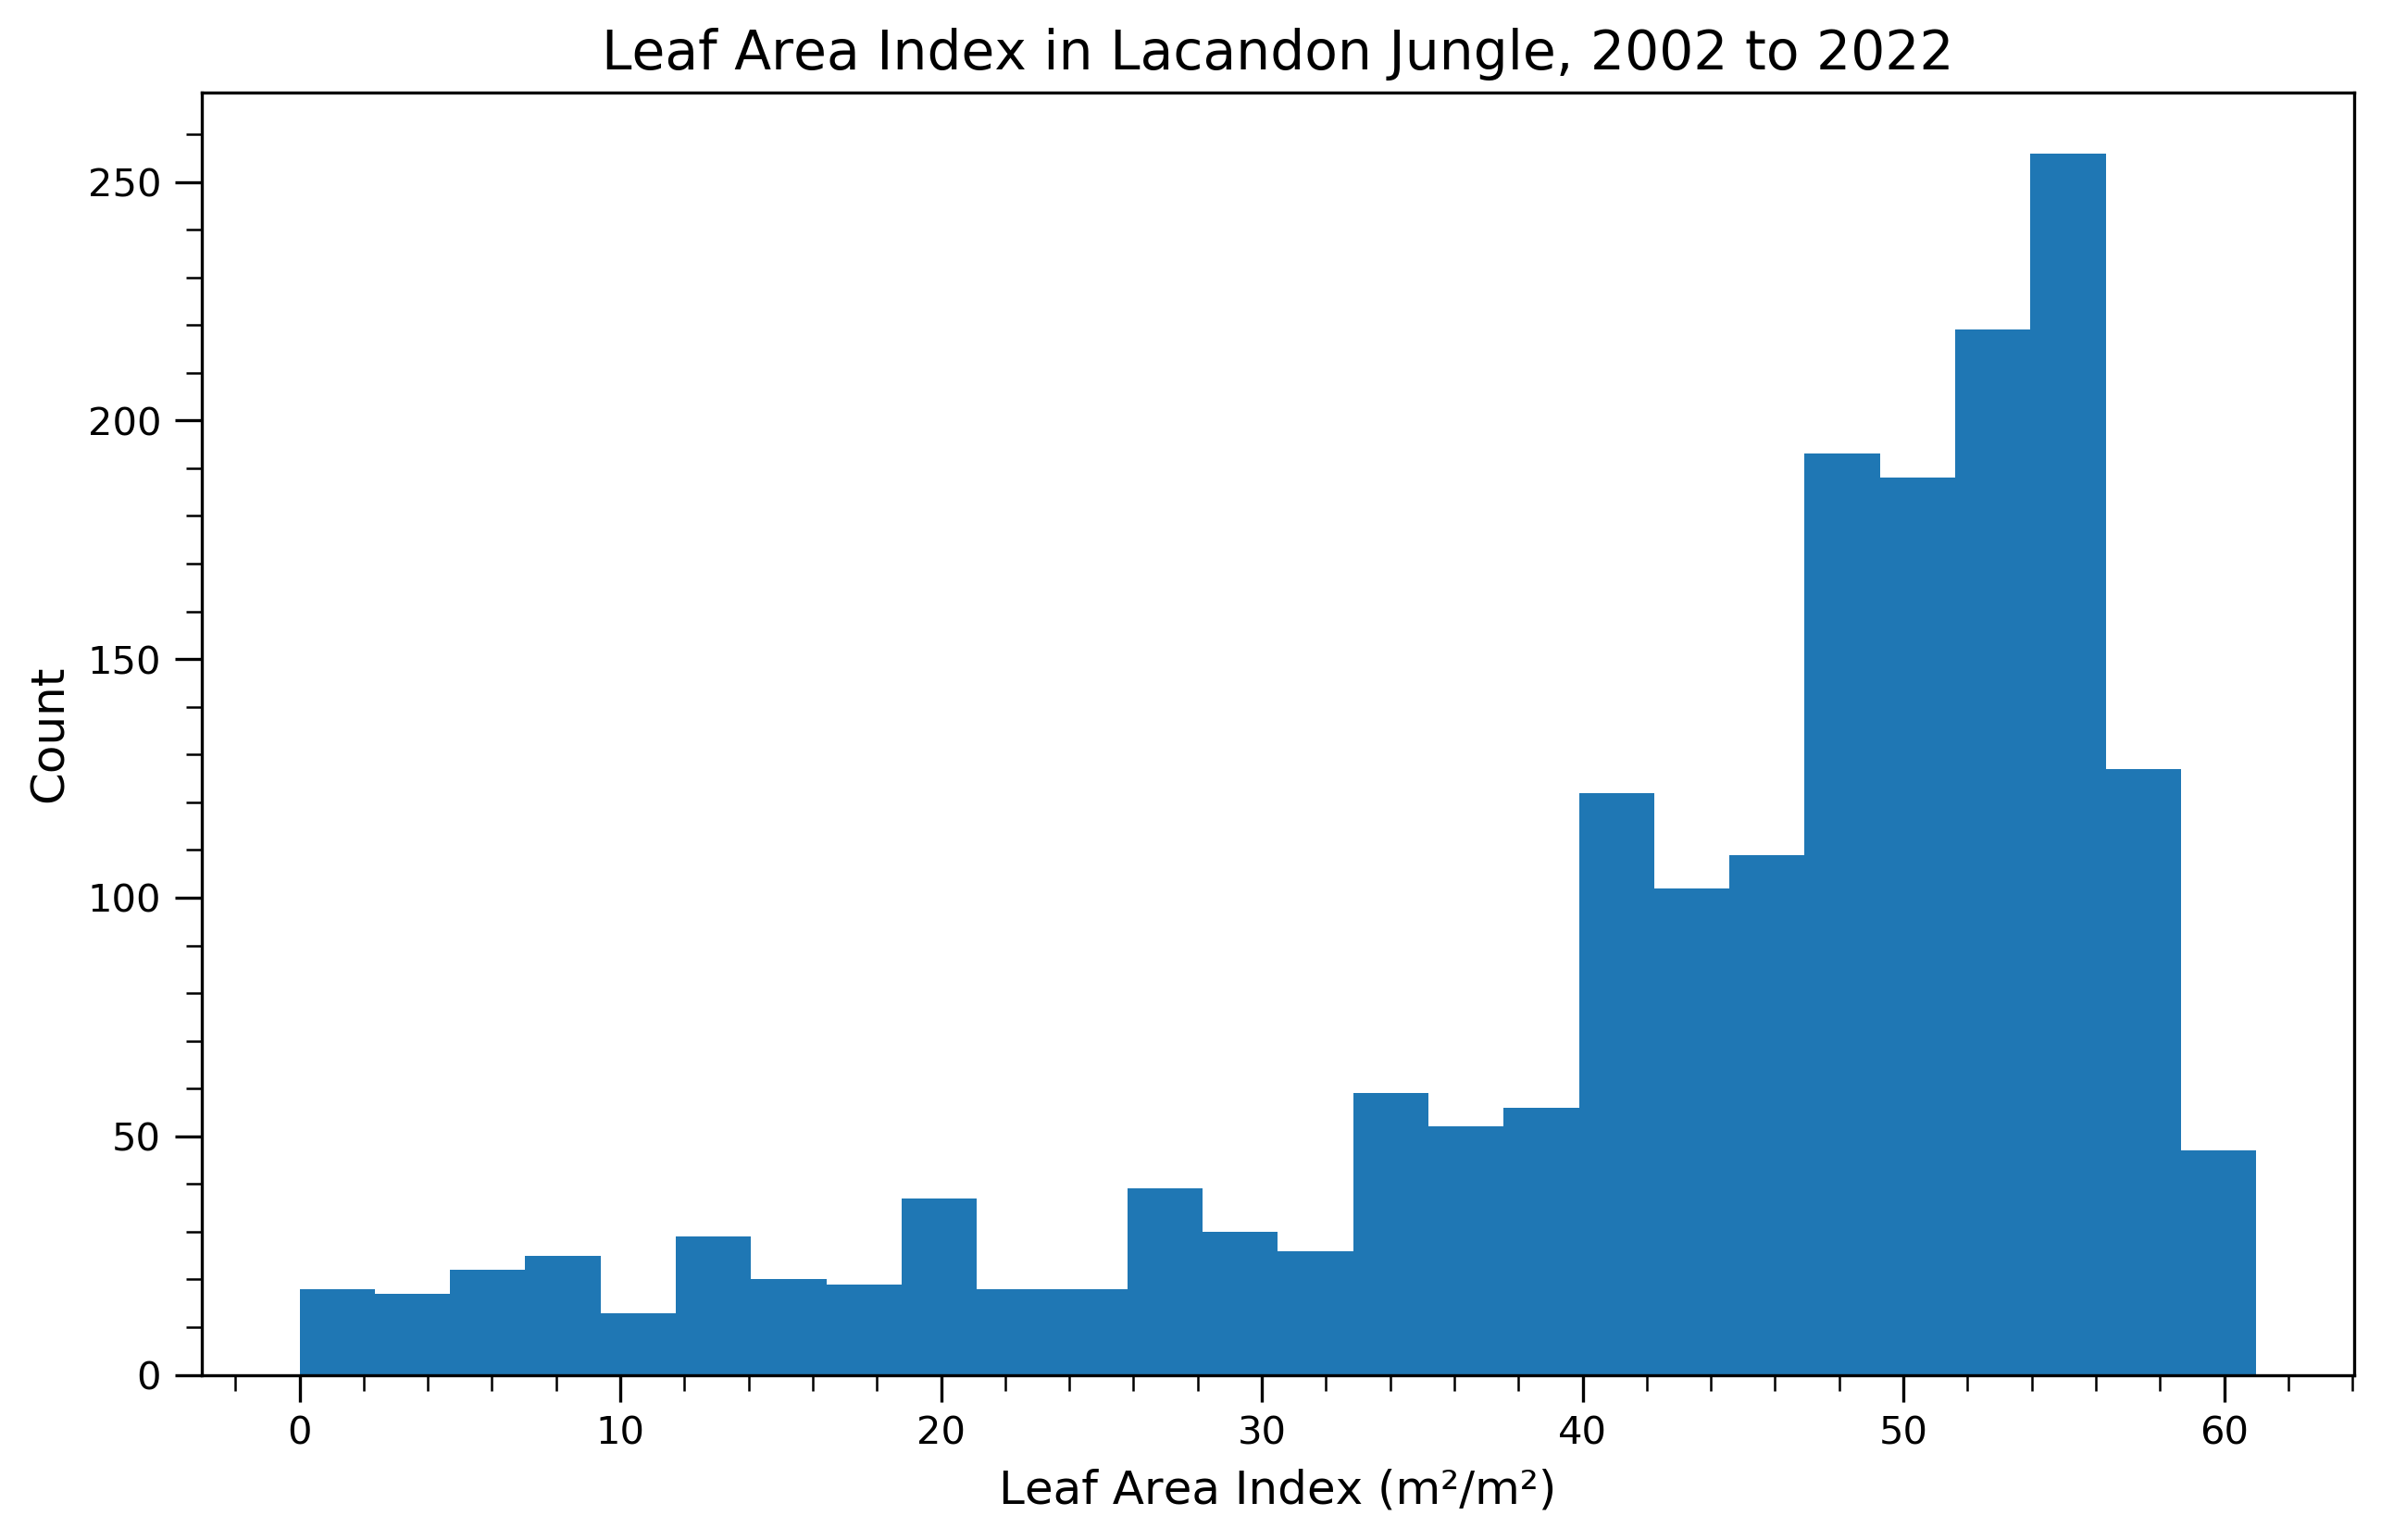

In [38]:
# Plot histogram for LAI variable in Lacandon Jungle
fig, ax = plt.subplots(figsize = (10, 6), dpi = 300) # create figure; set size and resolution (dpi)
n, bins, patches = ax.hist(x = df_laiJ['Lai'], bins = 'auto') # add histogram to plot
plt.title('Leaf Area Index in Lacandon Jungle, 2002 to 2022', fontsize = 14) # add title to plot
plt.xlabel('Leaf Area Index (m²/m²)', fontsize = 12) # add x label to plot
plt.ylabel('Count', fontsize = 12) # add y label to plot
ax.yaxis.set_minor_locator(AutoMinorLocator()) # set automatic tick selection for y-axis
ax.xaxis.set_minor_locator(AutoMinorLocator()) # set automatic tick selection for x-axis
ax.tick_params(which = 'major', length = 7) # set major ticks
ax.tick_params(which = 'minor', length = 4) # set minor ticks

<a id='usecases'></a> 
### Use Case Examples

This is the "meat" of the notebook, and what will take the majority of the time to present in class. This section should provide:
1) A plain-text summary (1-2 paragraphs) of the use case example you have chosen: include the target users and audience, and potential applicability. 

2) Markdown and code blocks demonstrating how one walks through the desired use case example. This should be similar to the labs we've done in class: you might want to demonstrate how to isolate a particularly interesting time period, then create an image showing a feature you're interested in, for example.

3) A discussion of the results and how they might be extended on further analysis. For example, if there are data quality issues which impact the results, you could discuss how these might be mitigated with additional information/analysis.

Just keep in mind, you'll have roughly 20 minutes for your full presentation, and that goes surprisingly quickly! Probably 2-3 diagnostics is the most you'll be able to get through (you could try practicing with your group members to get a sense of timing).


<a id='binder'></a> 
### Create Binder Environment

The last step is to create a Binder environment for your project, so that we don't have to spend time configuring everyone's environment each time we switch between group presentations. Instructions are below:

 - Assemble all of the data needed in your Github repo: Jupyter notebooks, a README file, and any datasets needed (these should be small, if included within the repo). Larger datasets should be stored on a separate server, and access codes included within the Jupyter notebook as discussed above. 
 
 - Create an _environment_ file: this is a text file which contains information on the packages needed in order to execute your code. The filename should be "environment.yml": an example that you can use for the proper syntax is included in this template repo. To determine which packages to include, you'll probably want to start by displaying the packages loaded in your environment: you can use the command `conda list -n [environment_name]` to get a list.
 
 More information on environment files can be found here:
 https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html#

 - Create Binder. Use http://mybinder.org to create a  URL for your notebook Binder (you will need to enter your GitHub repo URL). You can also add a Launch Binder button directly to your GitHub repo, by including the following in your README.md:

```
launch with myBinder
[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/<path to your repo>)
```

<a id='references'></a> 
### References

1. Myneni, R., Knyazikhin, Y., Park, T. (2021). <i>MODIS/Terra+Aqua Leaf Area Index/FPAR 8-Day L4 Global 500m SIN Grid V061</i> [Data set]. NASA EOSDIS Land Processes DAAC. Accessed 2022-11-14 from https://doi.org/10.5067/MODIS/MCD15A2H.061